<a href="https://colab.research.google.com/github/LaurenOKane/Learning-Python/blob/main/L6_BSc_Data_Science_M6T8_AutoML_and_EDA_Libraries_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

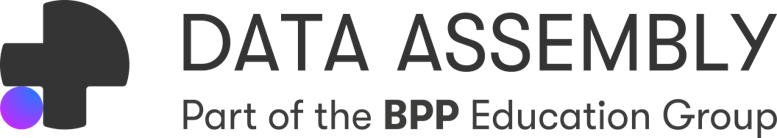

<h3><font color="#AA00BB">How you can use this Notebook</font></h3>
<p>This notebook was written to teach new concepts in data using Python.</p>
<p>You can read through the descriptions run the code (it should work!), or you may be taken through the code by one of our experts.</p>
<p>But one of the best habits to acquire is to re-write the code yourself.</p>
<ul><li>Experiment
<li>Break the code
<li>Build a deeper understanding of both the underlying data concepts and the code</ul>
<p>Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.</p>
<p>Enjoy!</p>
<p> - <i><font color="#AA00BB">Data Assembly team.</font></i></p>
<br>

> ❓🤔 = a question for us discuss

> ⌨️ = a task for you to try

> 🔑 = an authoritative reference or guide you may find useful

> 🚀 = **optional** material to develop yourself further



<a name="contents"></a>
## Contents

<br>1. [Churn data set: import and EDA](#section_1)
<br>2. [AutoML: pre-processing](#section_2)
<br>3. [AutoML: model building](#section_3)
<br>4. [Explain how model works to stakeholders](#section_4)
<br>5. [🚀 Further checks (e.g. fairness)](#section_5)



<h2><font color="#AA00BB">Predictive to Prescriptive Analytics: from Insight to Action</font></h2>

The journey from raw data to actionable insights is pivotal in data science and is enriched by the integration of Automated Machine Learning (AutoML) and Exploratory Data Analysis (EDA). These two fields serve as instrumental tools for data scientists to refine and enhance the machine learning workflow.

Here's how they contribute to the analytics spectrum:

- **Exploratory Data Analysis (EDA)**: This is a critical initial phase where data scientists get familiar with the data, looking for patterns, anomalies, trends, and relationships. EDA tools in Python, such as `Pandas Profiling` or `Sweetviz`, help in visualising and summarising the data, making it easier to uncover insights and decide on the appropriate predictive model.

- **Automated Machine Learning (AutoML)**: AutoML tools, like `Google's AutoM`L or `H2O.ai`, streamline the model building process. They automatically select the best model, perform feature engineering, hyperparameter tuning, and even model deployment, which significantly reduces the time and expertise required in model development.

**Combining EDA with AutoML aligns with the stages of analytics:**

- EDA tools help with Descriptive and Diagnostic Analytics, clarifying "What did happen?" and "Why did it happen?"
- AutoML tools, on the other hand, propel Predictive Analytics, tackling "What might happen?" by forecasting future events using historical data.

Finally, the transition to Prescriptive Analytics is where both the insight from EDA and predictions from AutoML converge to suggest actionable steps. Data scientists must translate the output of these tools into strategic actions and communicate them effectively to stakeholders. This ensures that decisions are not just driven by data but are also implementable and aligned with organisational goals, completing the transition from insight to action.

> 🔑 https://pycaret.gitbook.io/docs/

> 🔑 https://github.com/fbdesignpro/sweetviz

These are not the only AutoML tools, you might also consider Auto-Sklearn in Python, AutoML in Azure, and AutoTrain by Hugging Face 🤗

> 🔑 https://github.com/automl/auto-sklearn

> 🔑 https://learn.microsoft.com/en-us/azure/machine-learning/concept-automated-ml?view=azureml-api-2

> 🔑🤗 https://huggingface.co/autotrain

---

**EDA with sweetviz:**

- Helps in quickly identifying data trends and relationships.
- Generates interactive visuals for better understanding and presentation.

**Bringing It All Together:**

- Interpreting AutoML and EDA outputs is crucial for clear stakeholder communication.
- Translates complex insights into actionable recommendations.

### **Setup and install required packages**

In [1]:
# pycaret is installed as well as shap for model explanation and sweetviz and pandas-profiling for auto EDA
!pip install -q pycaret[analysis] shap sweetviz
!pip install pandas-profiling

# Data manipulation and plotting
import pandas as pd

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 31.7 MB/s

<a name="section_1"></a>

## **1. Auto EDA - Churn data set: import and EDA**


[Return to contents](#contents)


We will use the *IBM HR Analytics Employee Attrition & Performance* data set from Kaggle.

> *Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists*: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

Let's go quickly from insight to action. First for insight we will explore the data visually (EDA) with `sweetviz` then build and explain a model visually that predicts which employees are most likely to leave their job (or churn) in `pycaret`. Then for action, we will explore then present our model outputs to provide a recommended way that users of the model can identify employees most likely to churn with a level of accuracy they understand.

We are going to use SweetViz to perform an automatic EDA.

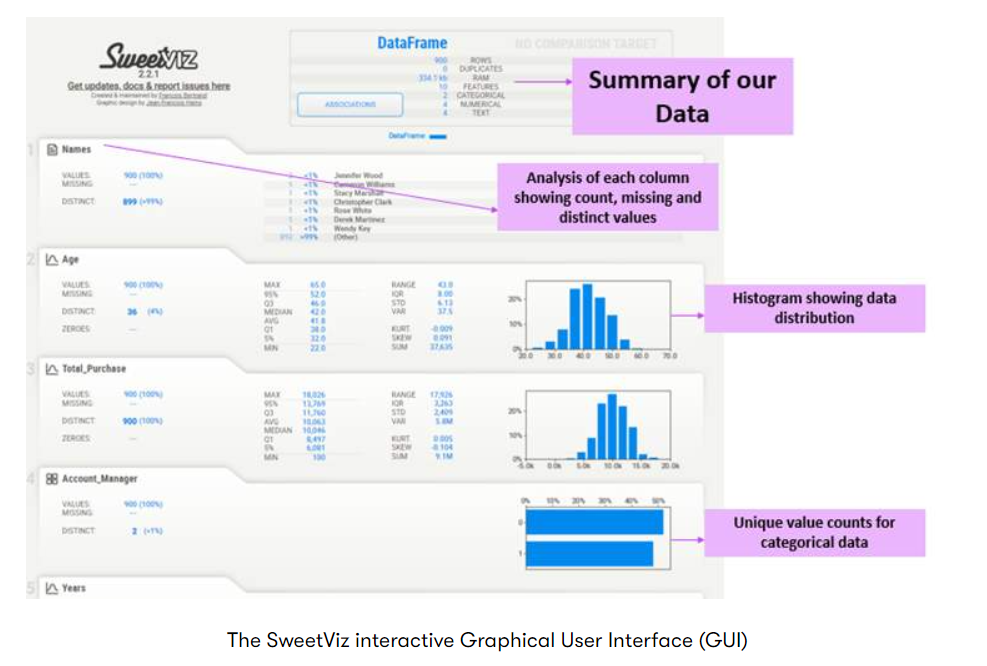

First, let's import the data.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/BPP-Digital-Advanced-Data-Analytics/public_datasets/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Most AutoML packages for binary outcomes require it to be an integer. Let's make the `Attrition` or churn column `1` for churn and `0` for not churn.

In [4]:
data['Attrition'] = data['Attrition'].replace({'Yes': 1, 'No': 0})
data['Attrition'] = data['Attrition'].astype(int)


---

<div style="background-color: #f9f9f9; border-left: 10px solid #36a64f; padding: 1em;">
    
<h2 style="color: #36a64f;">⌨️ ACTIVITY 1</h2>

</div>

1. Run the SweetViz report below. It provides an automated Exploratory Data Analysis (EDA) of each feature against the target of whether IBM employees churned or not.

2. Open a blank PowerPoint and use a snipping tool (e.g. https://apps.microsoft.com/store/detail/snipping-tool/9MZ95KL8MR0L) to copy and paste the plots with the strongest relationships between each feature and the outcome of churn.

3. When you past each plot into a slide, add a short compelling title, for example, "Older employees churn less".

3. 🚀 If time allows, select any other plots that surprise or interest you and include them in your presentation too. For example, screenshot and explain the correlation matrix heatmap. You can find this by clicking the `Associations` button in the `sweetviz` report.

---

                                             |          | [  0%]   00:00 -> (? left)


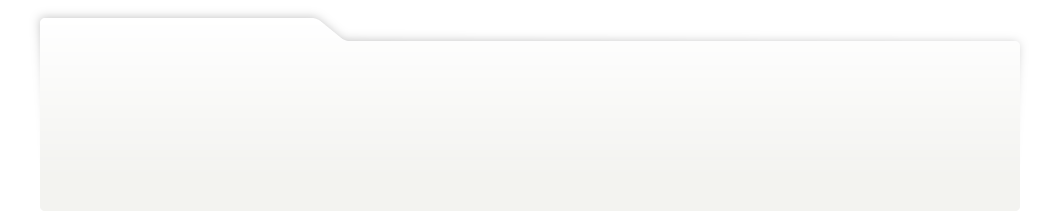
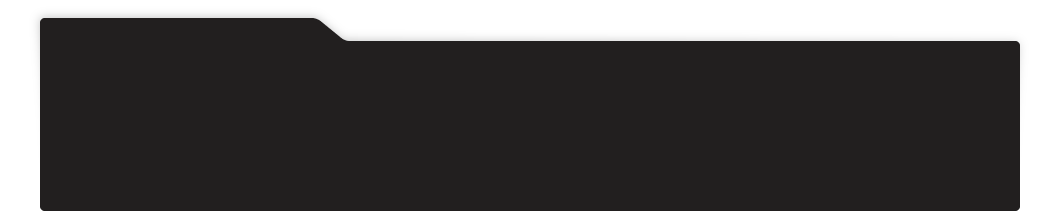
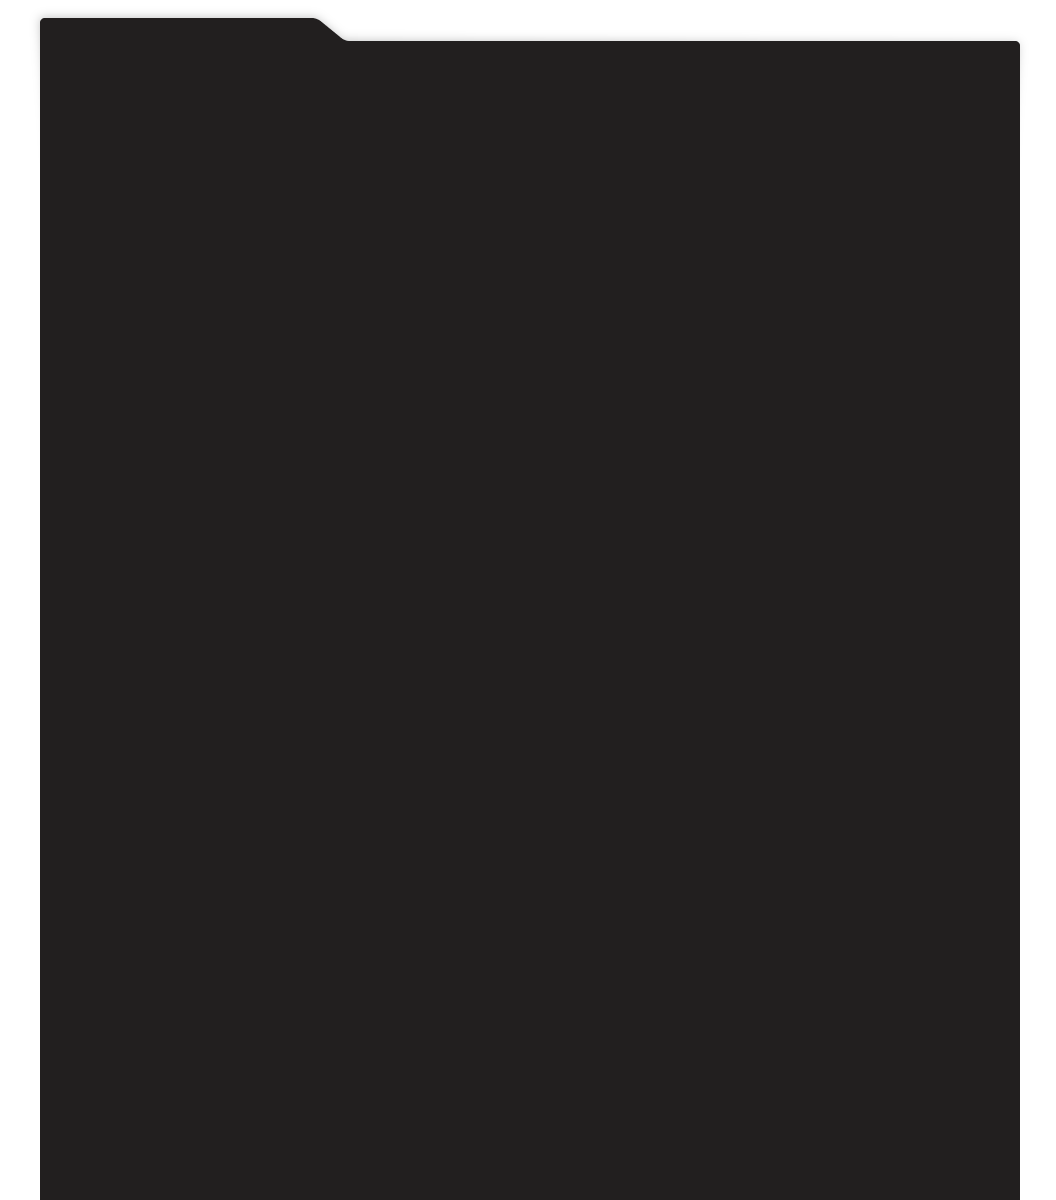
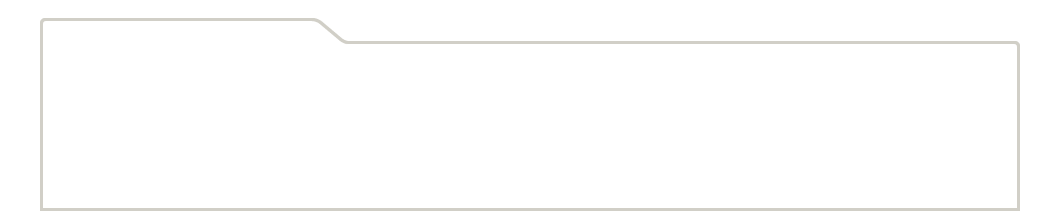
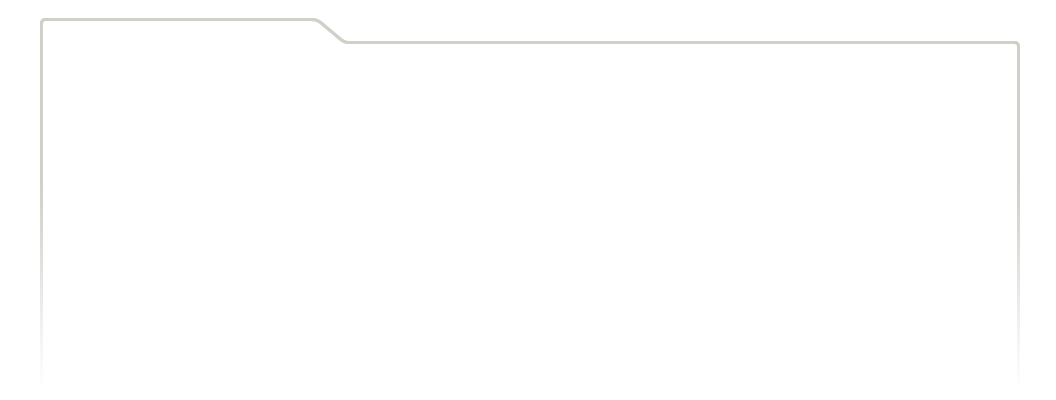
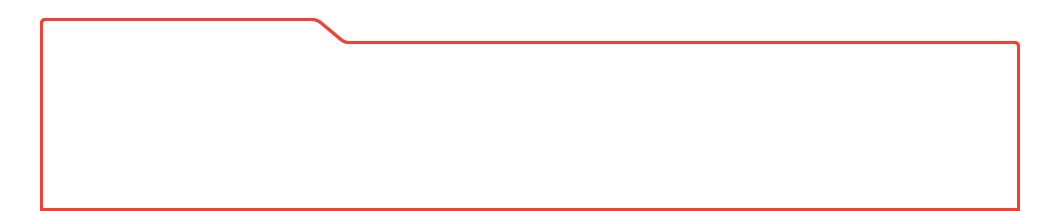
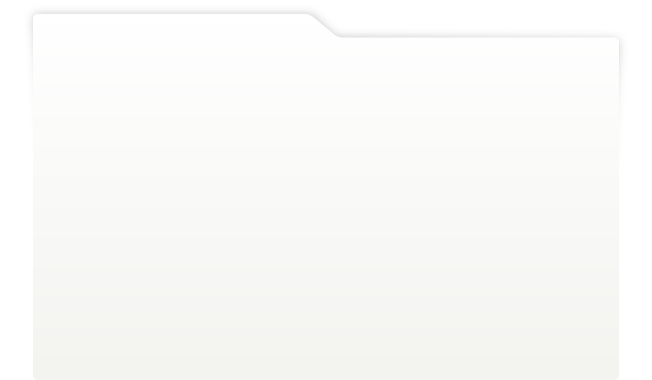
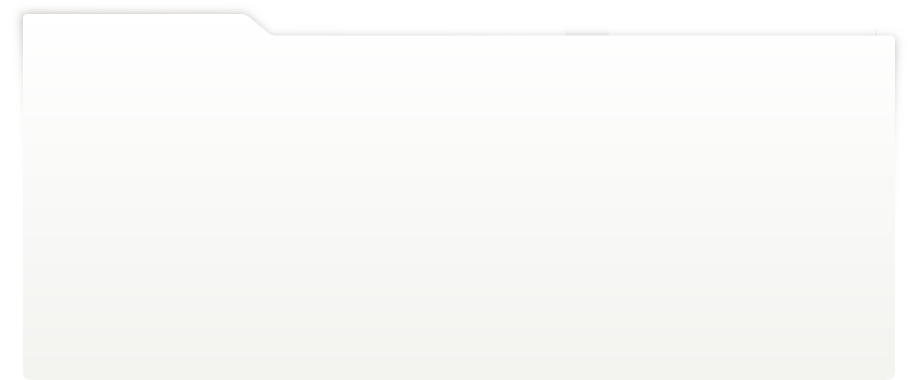
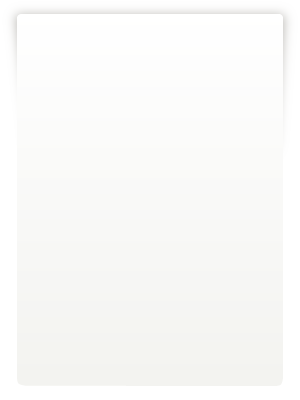
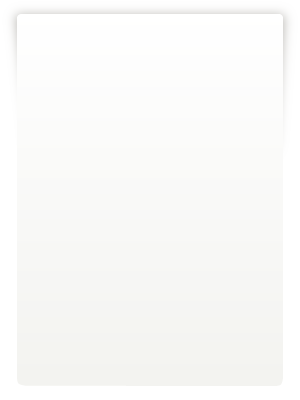
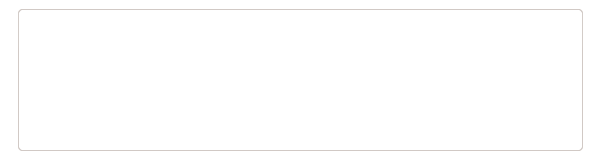
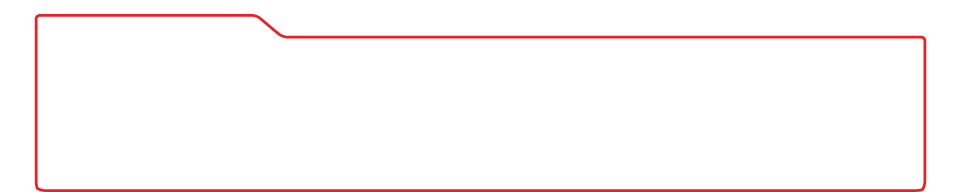
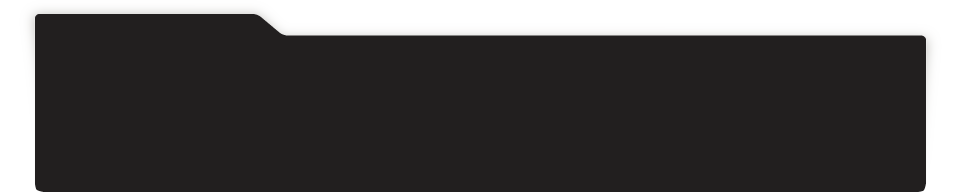
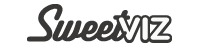
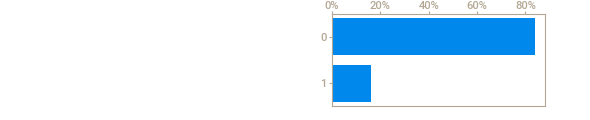
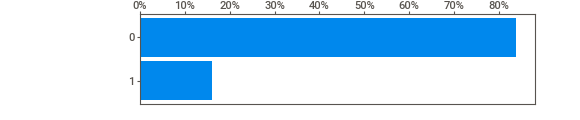
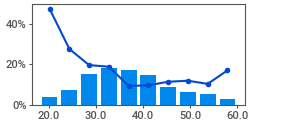
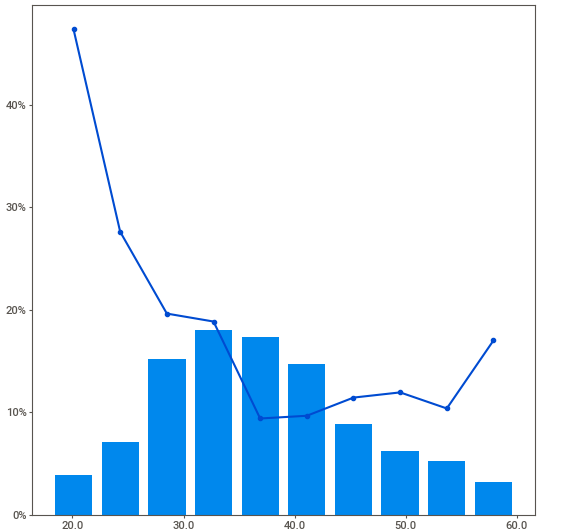
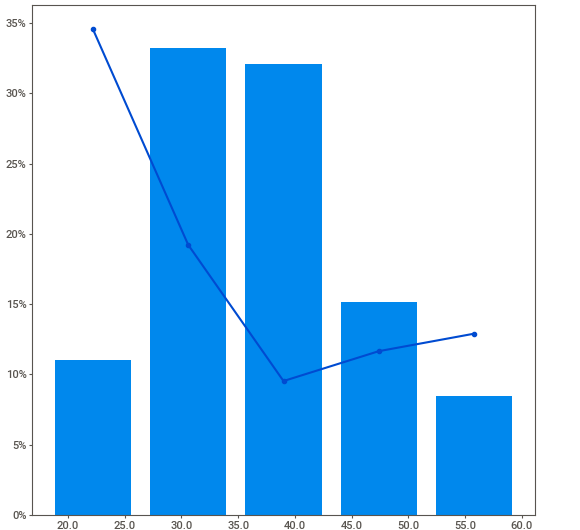
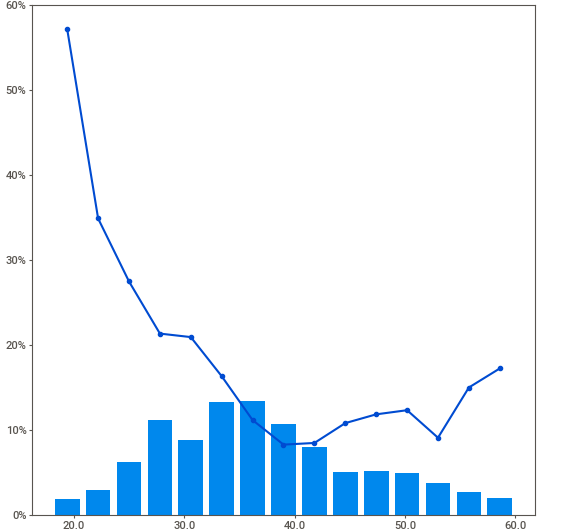
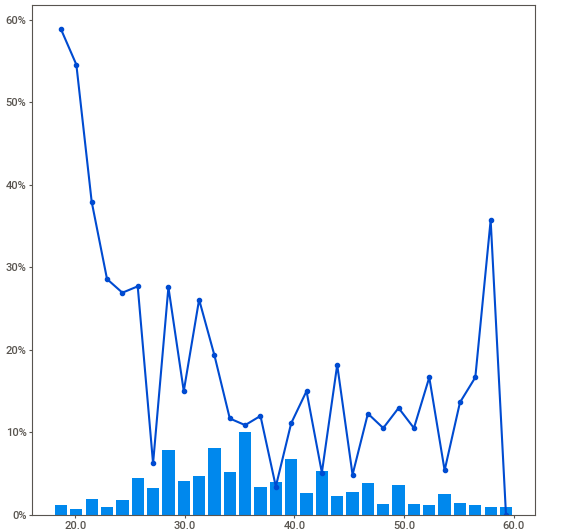
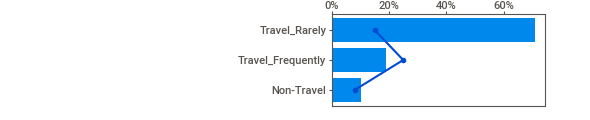
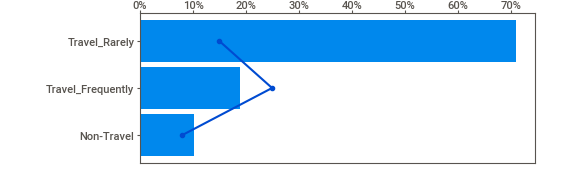
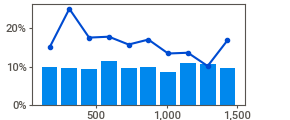
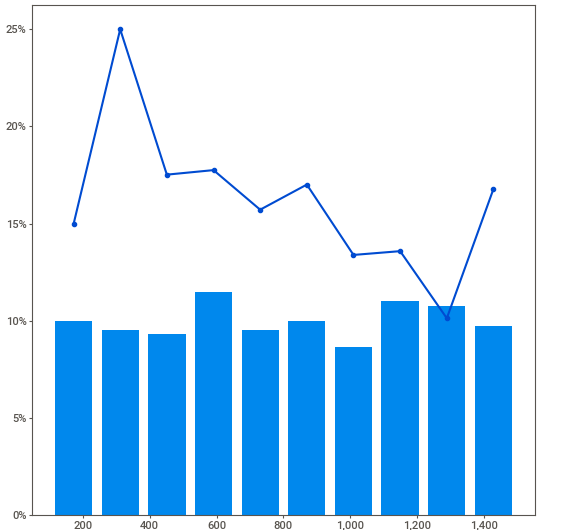
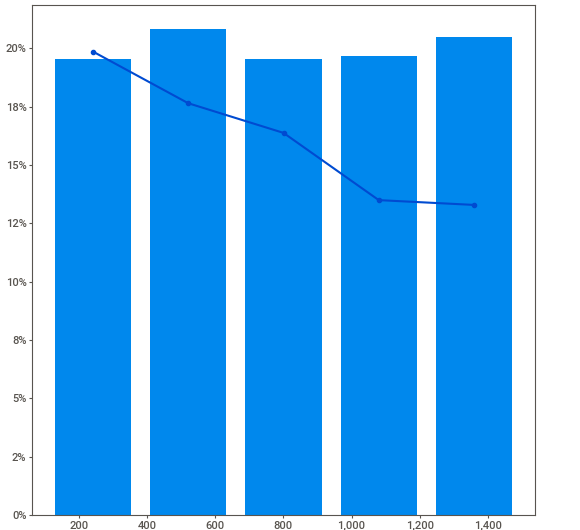
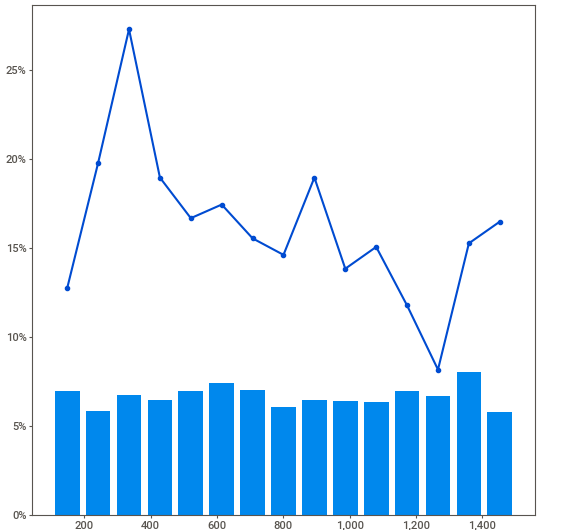
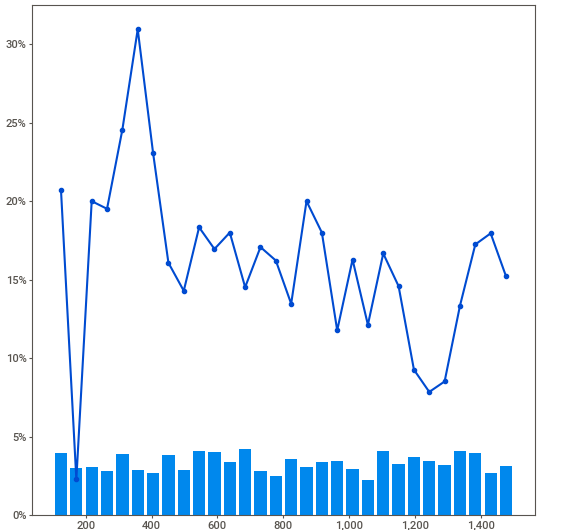
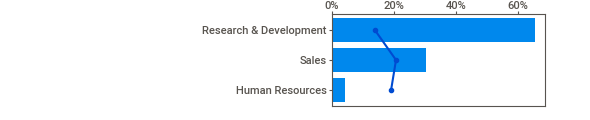
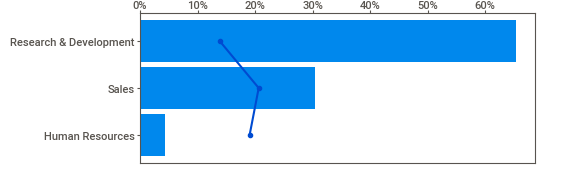
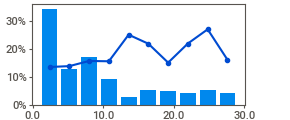
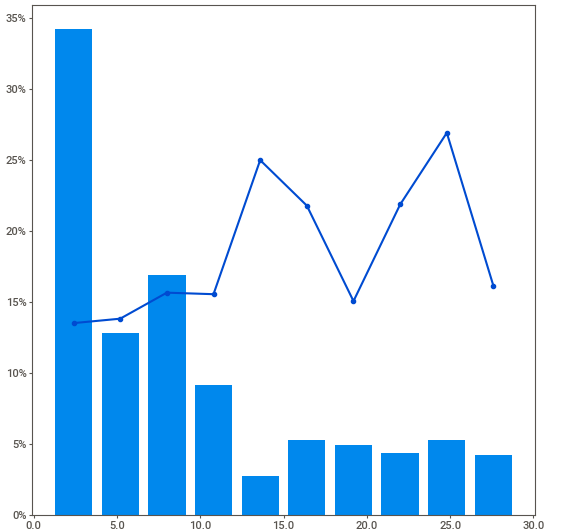
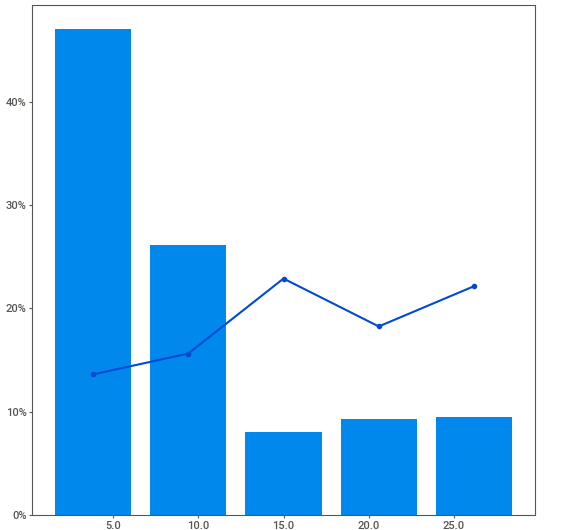
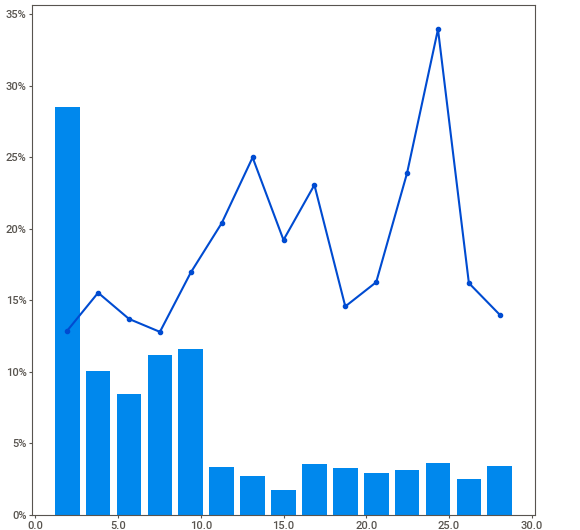
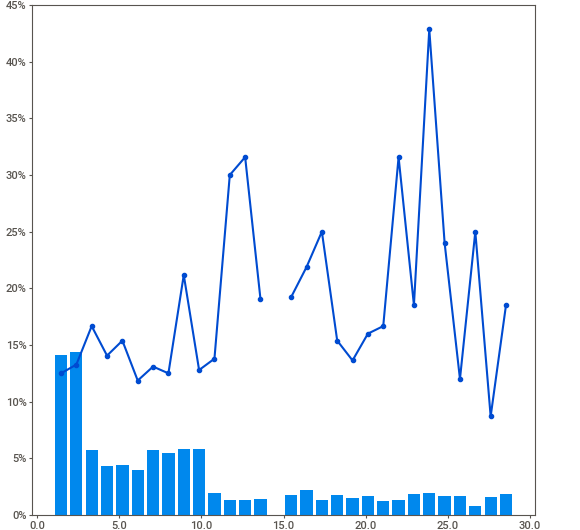
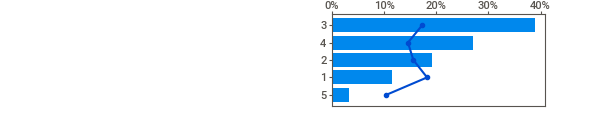
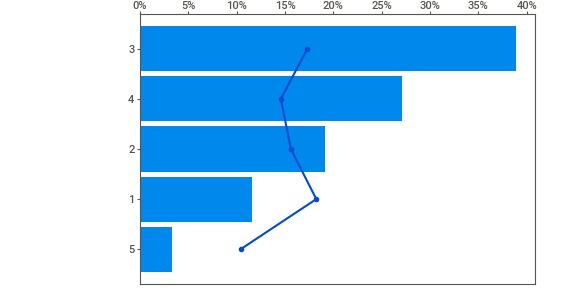
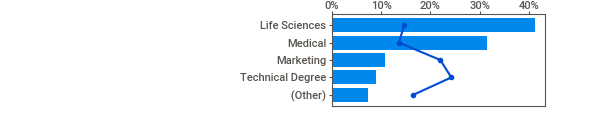
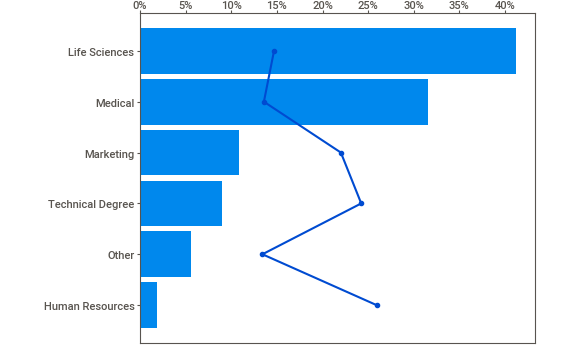
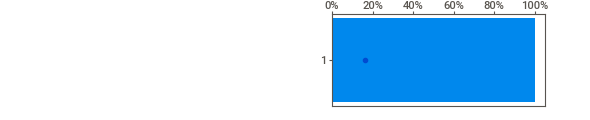
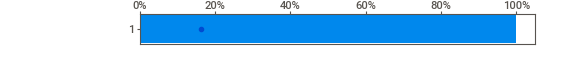
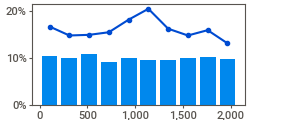
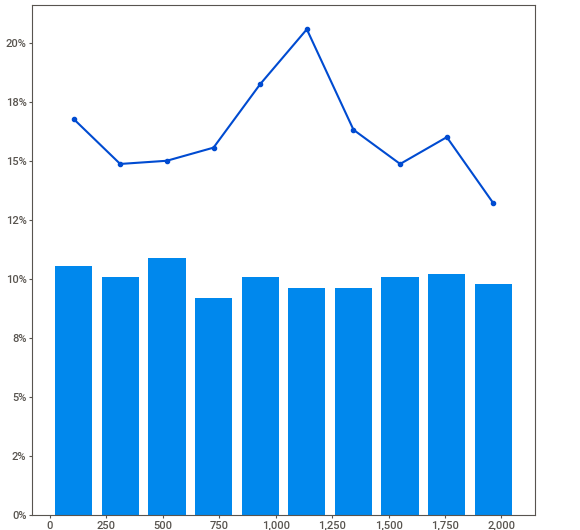
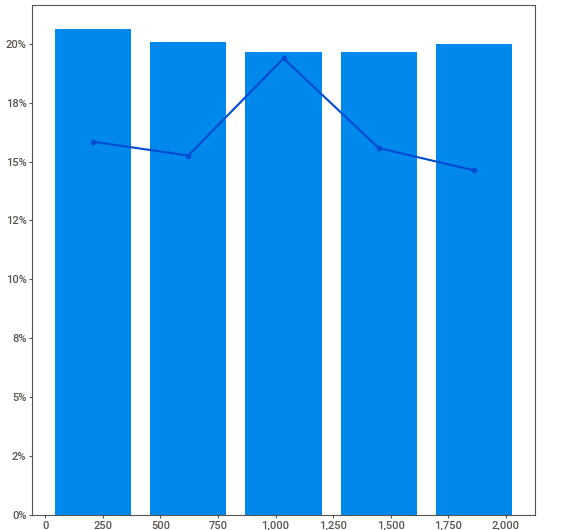
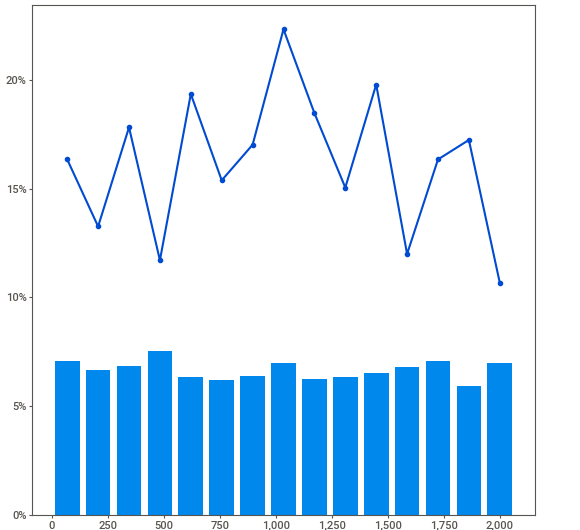
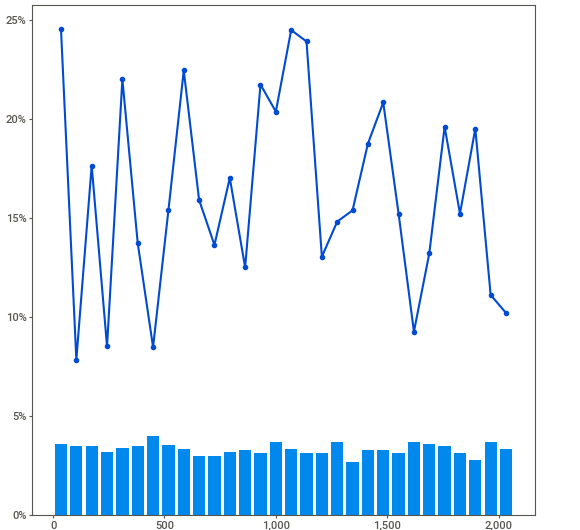
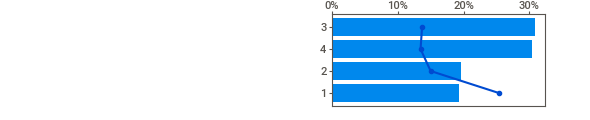
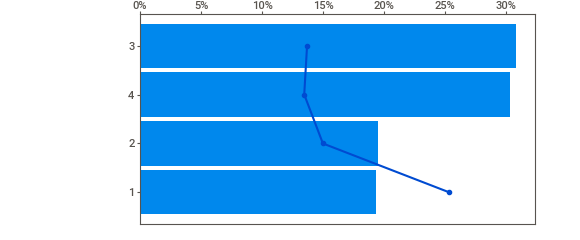
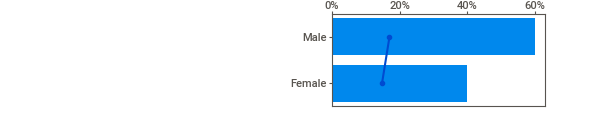
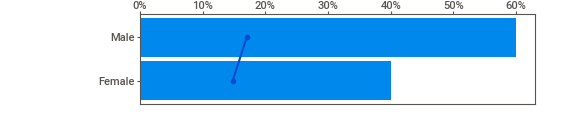
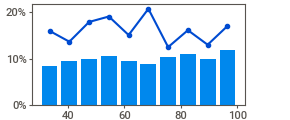
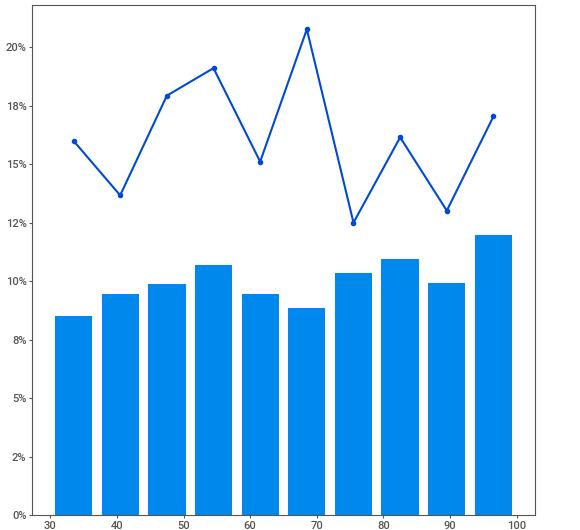
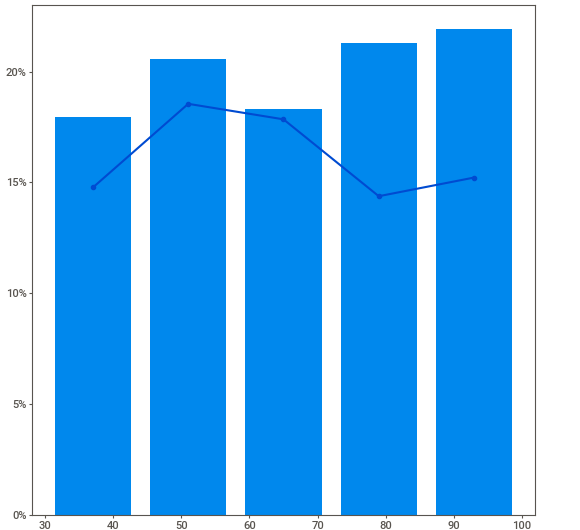
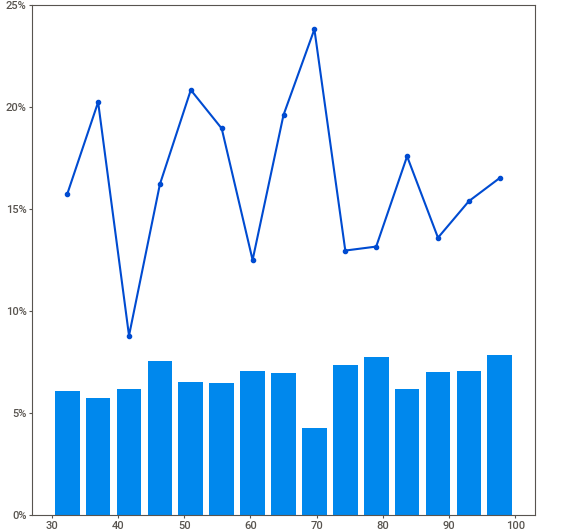
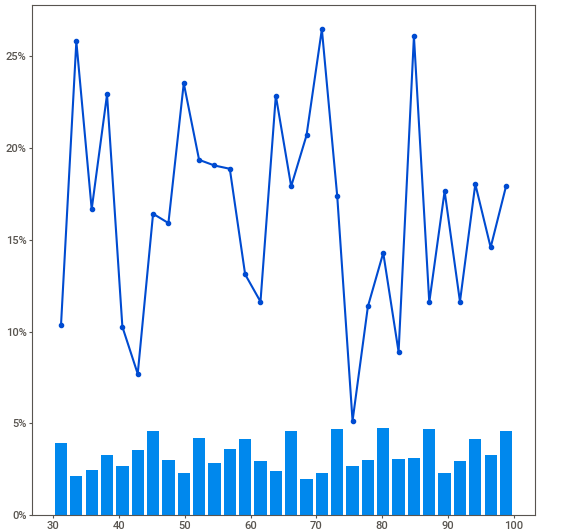
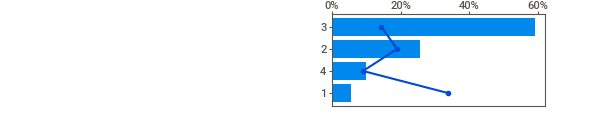
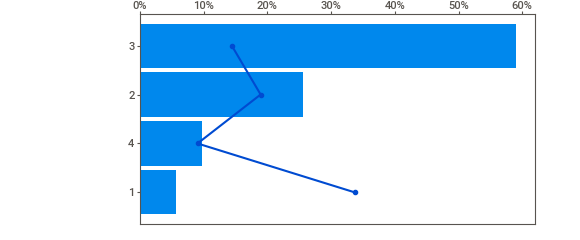
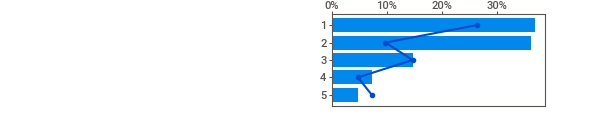
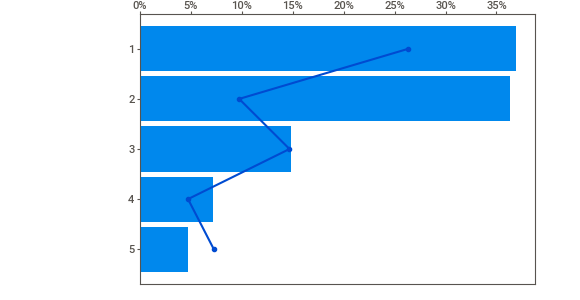
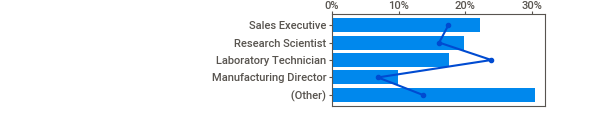
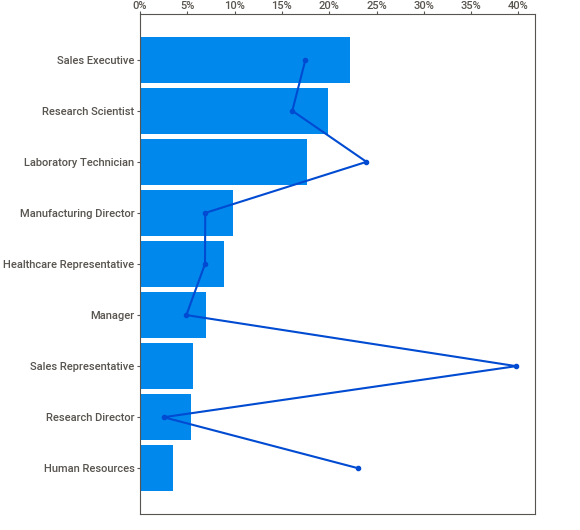
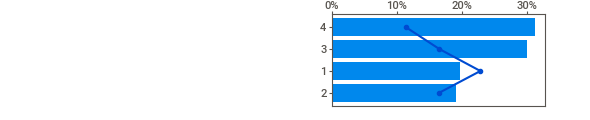
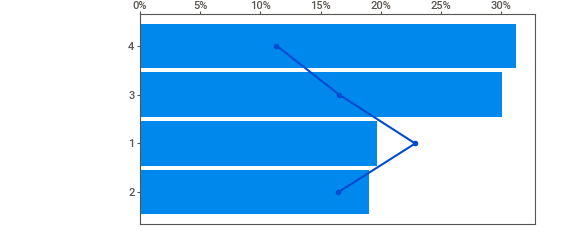
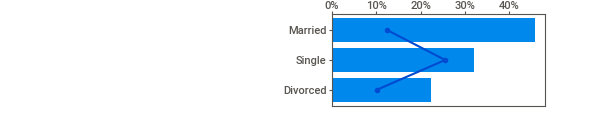
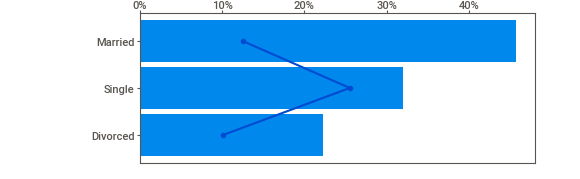
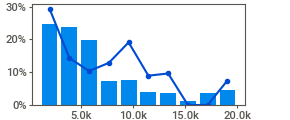
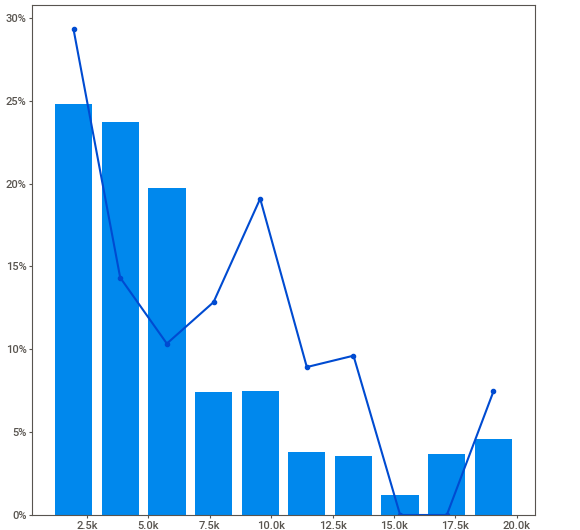
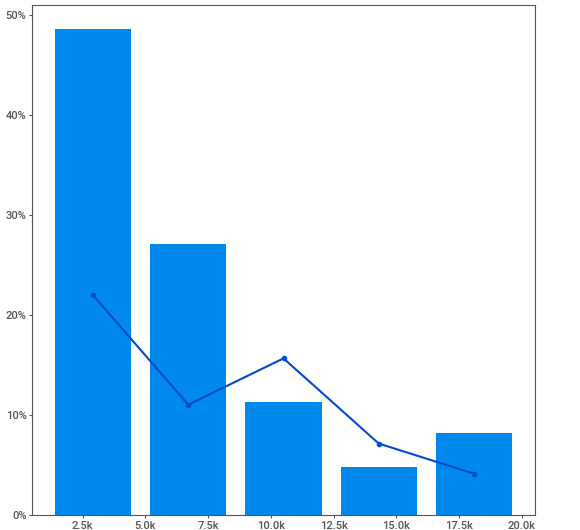
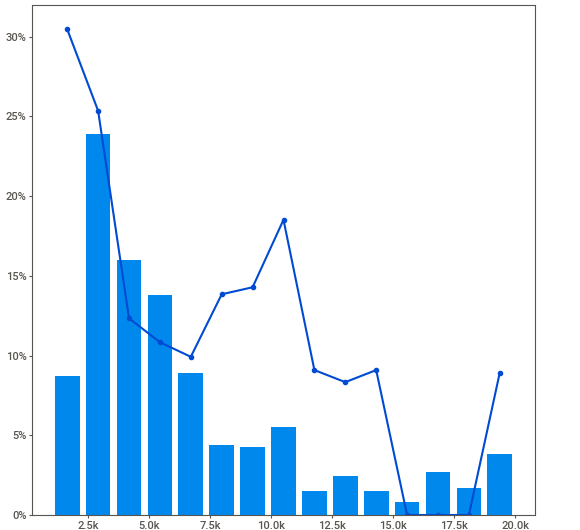
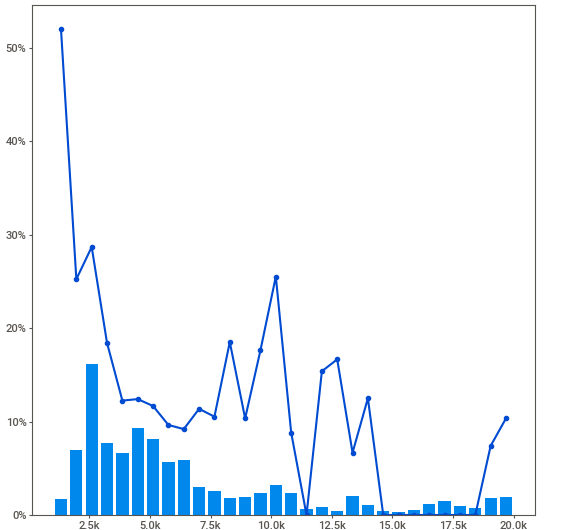
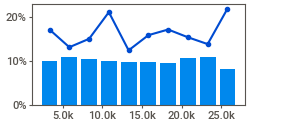
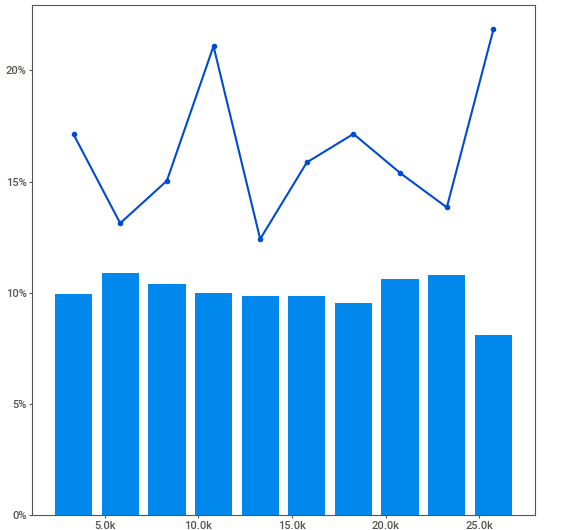
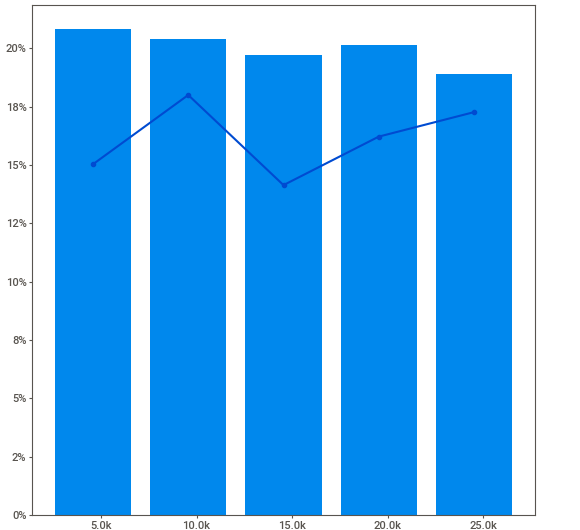
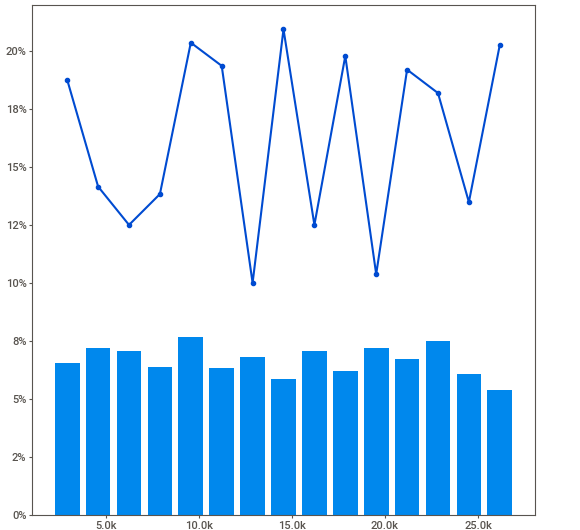
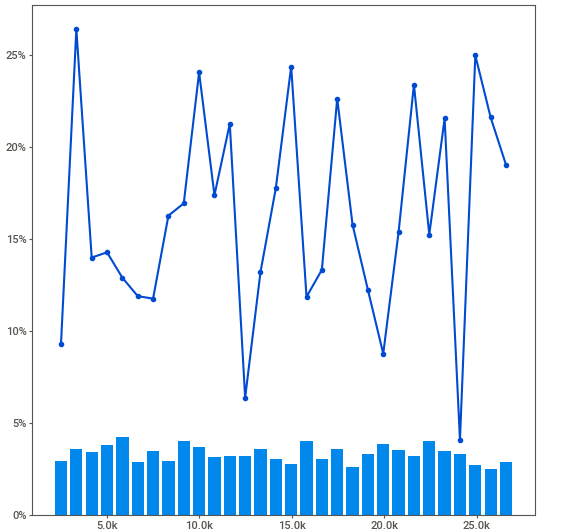
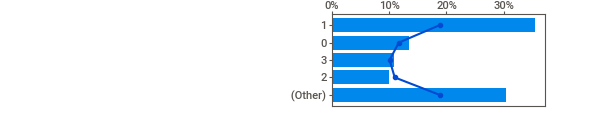
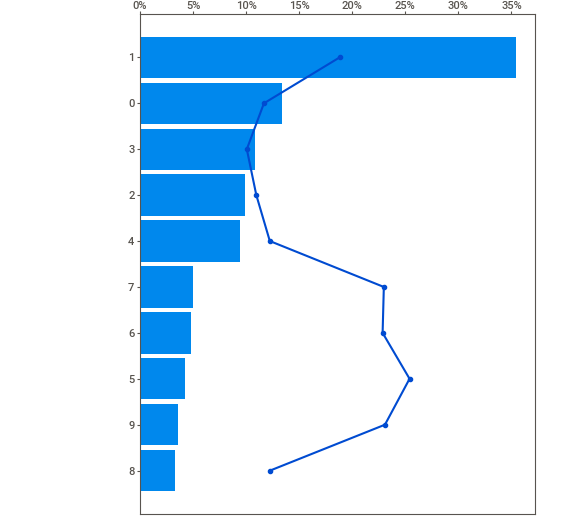
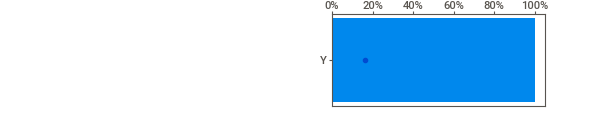
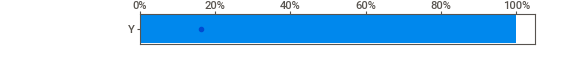
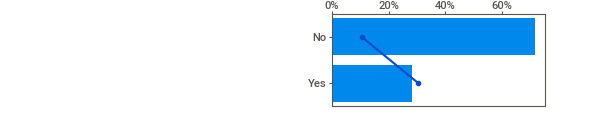
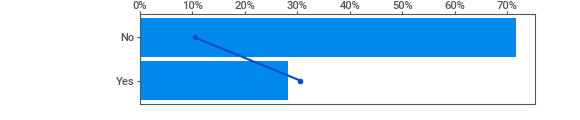
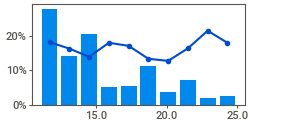
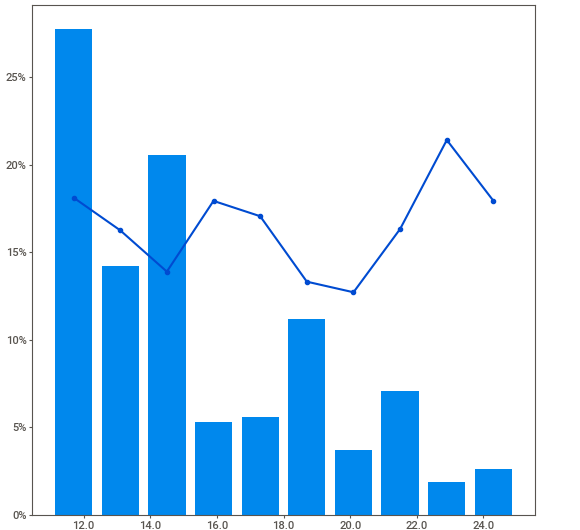
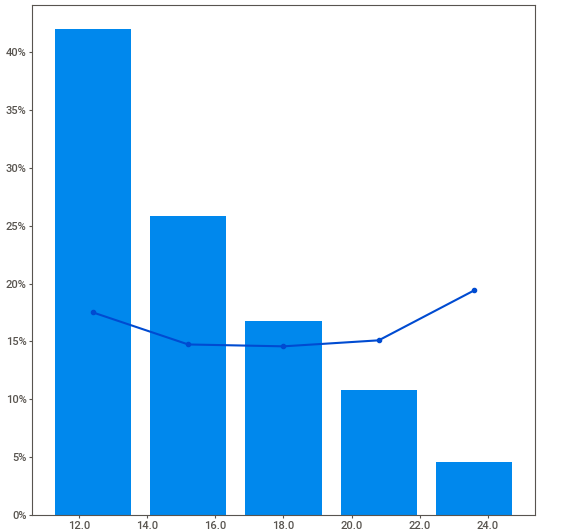
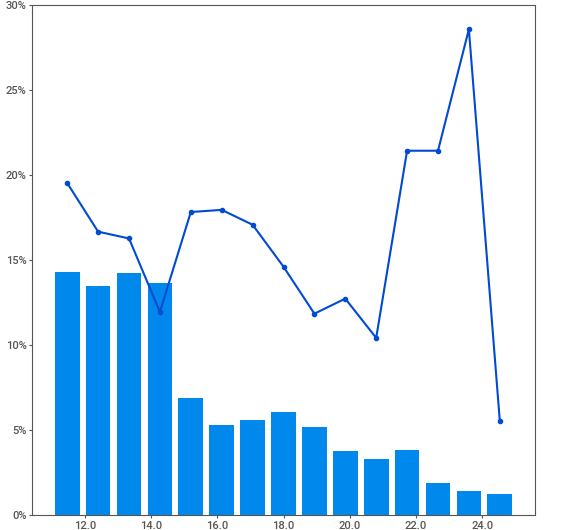
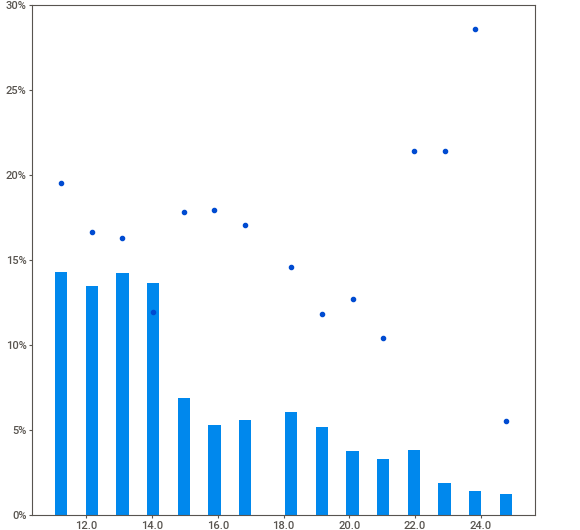
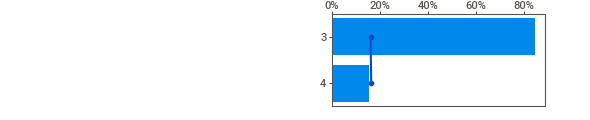
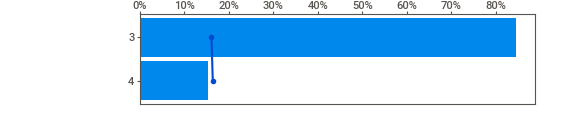
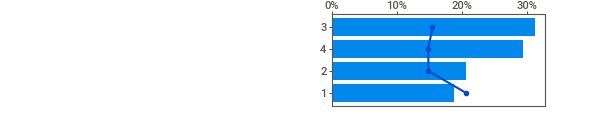
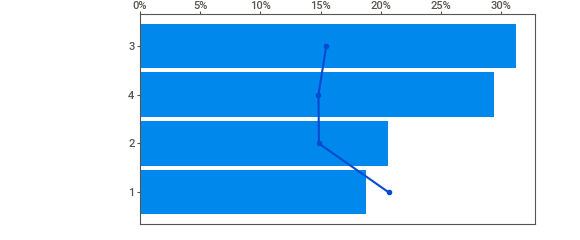
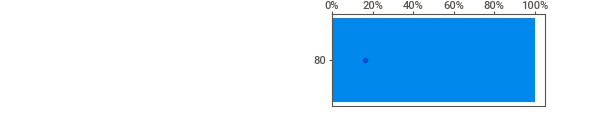
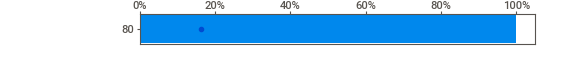
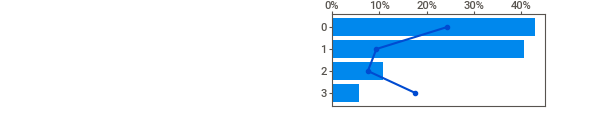
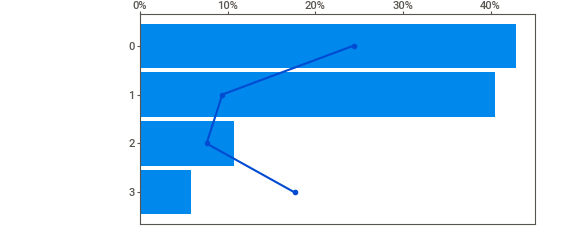
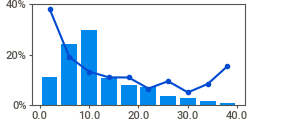
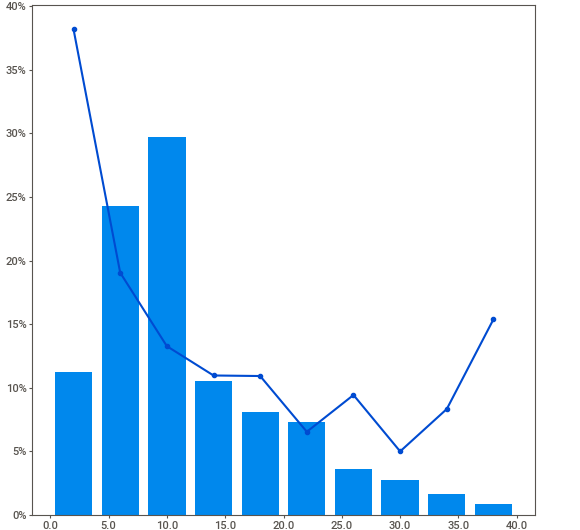
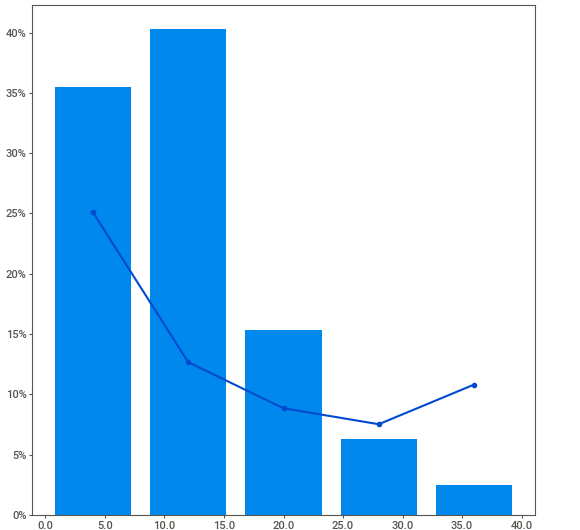
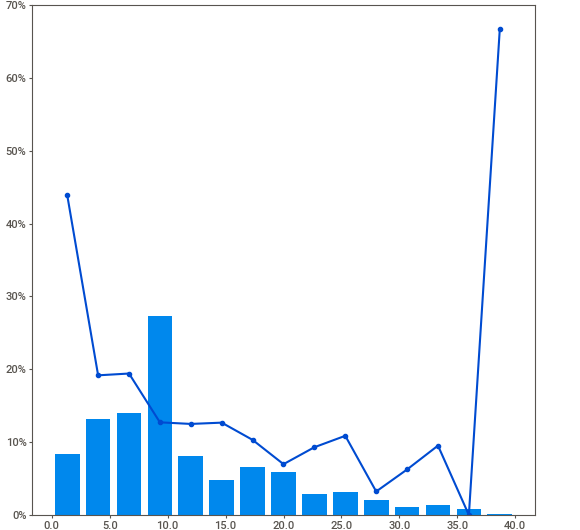
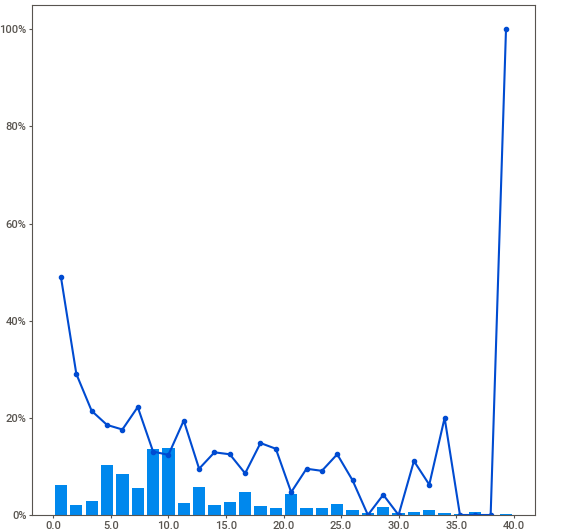
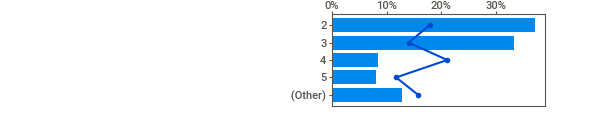
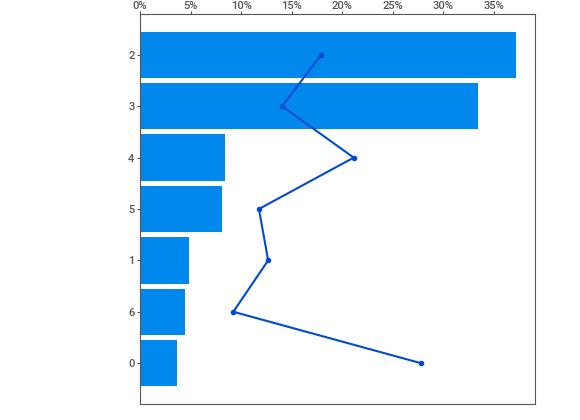
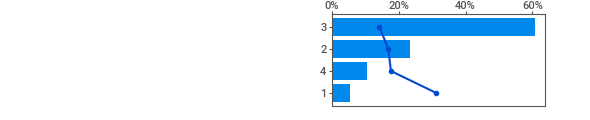
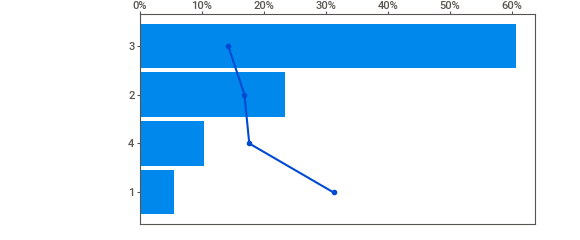
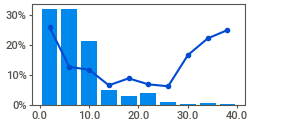
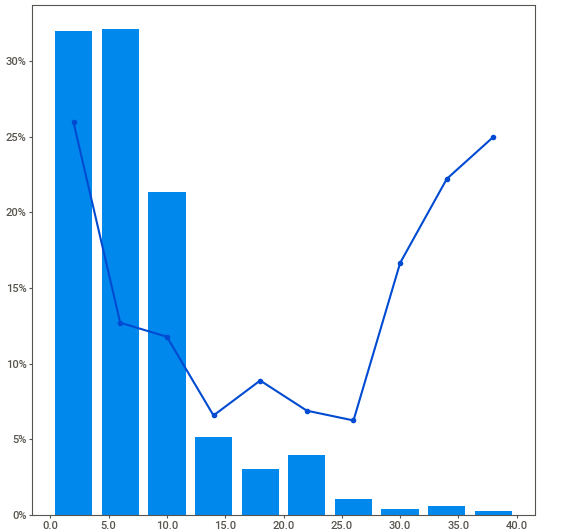
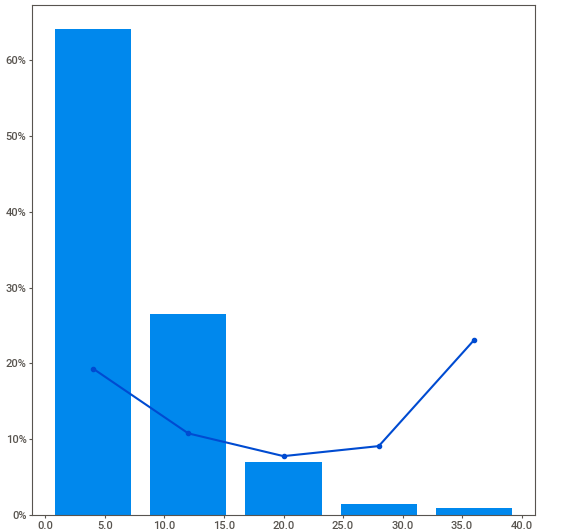
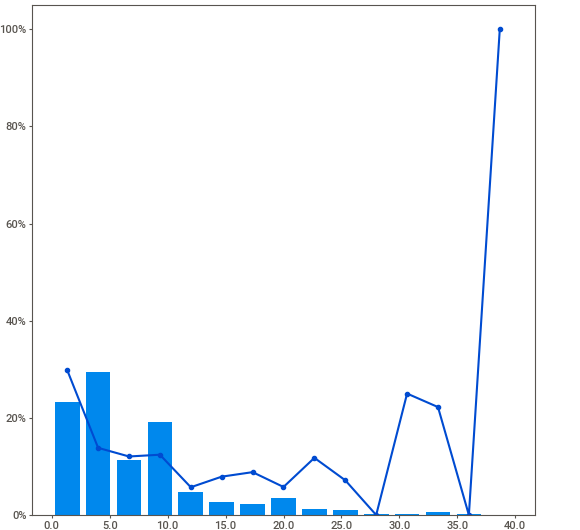
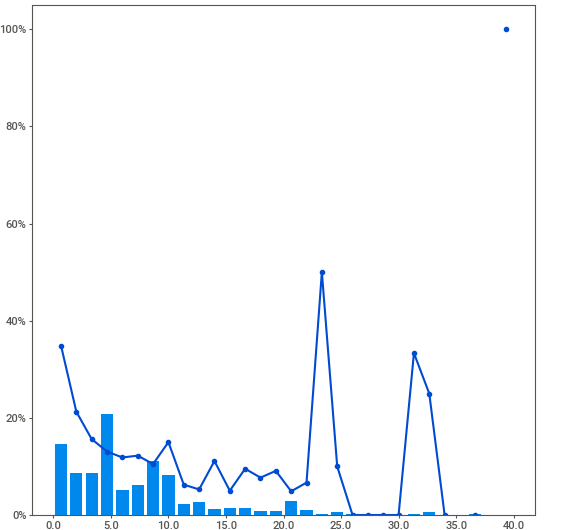
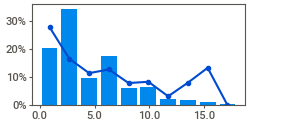
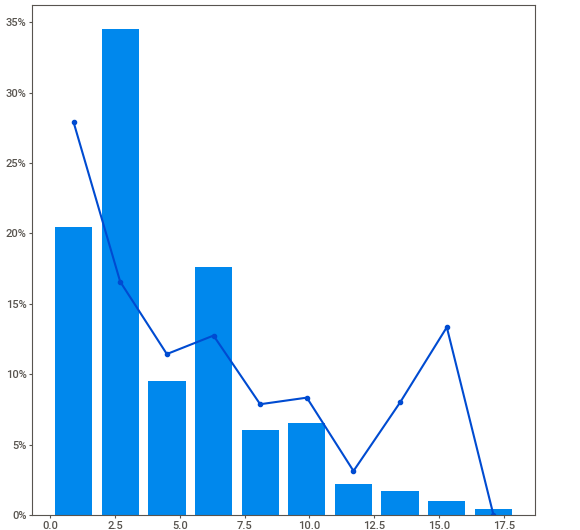
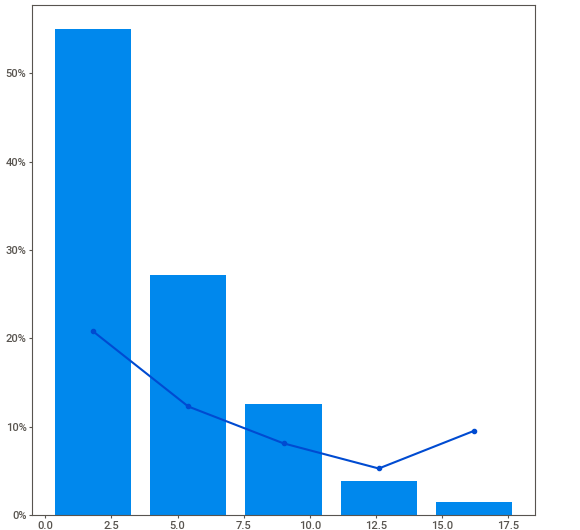
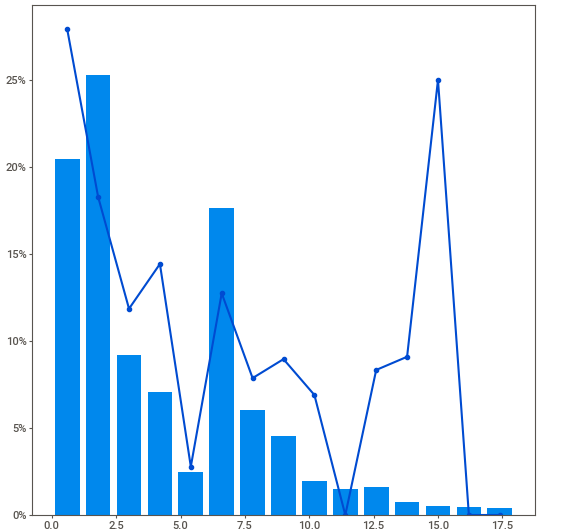
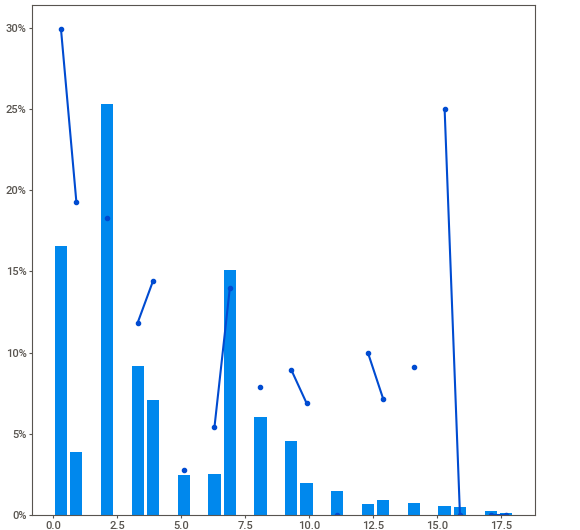
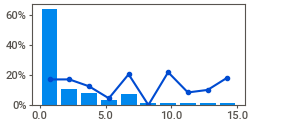
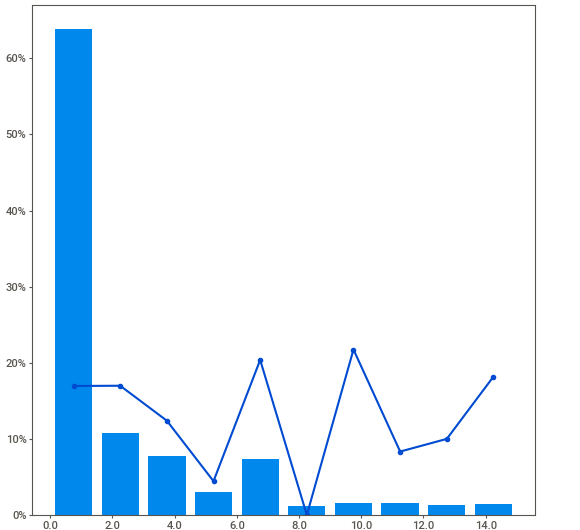
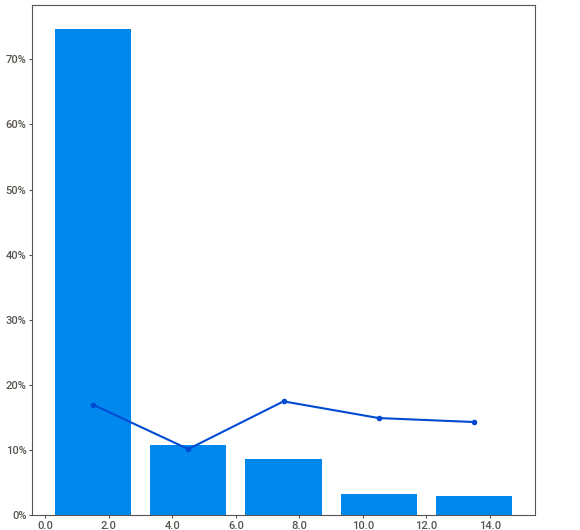
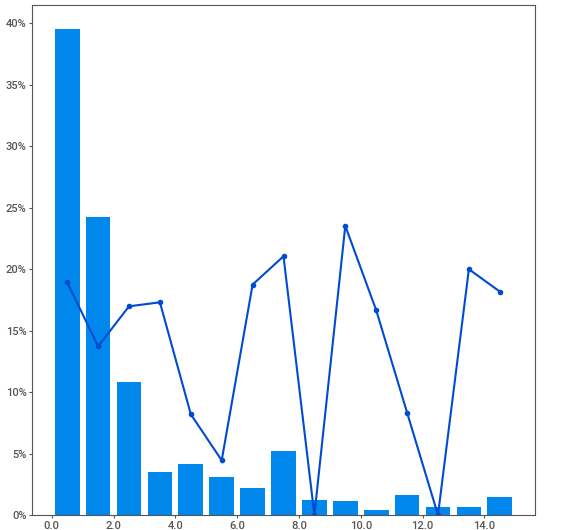
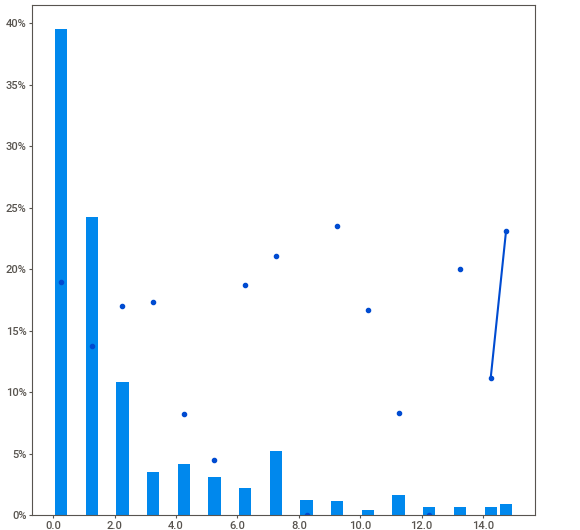
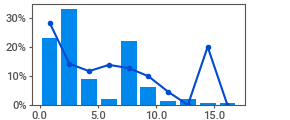
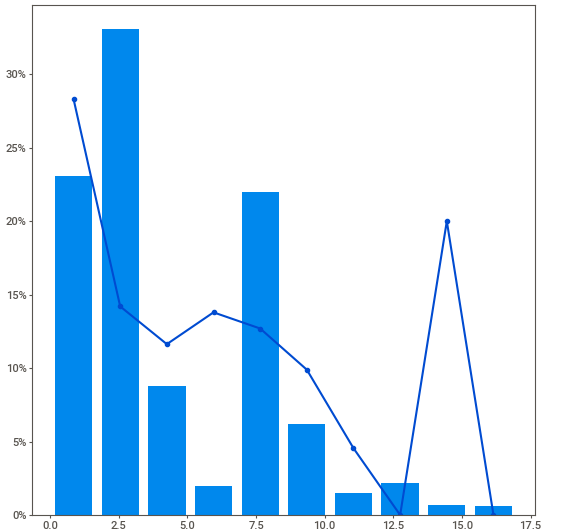
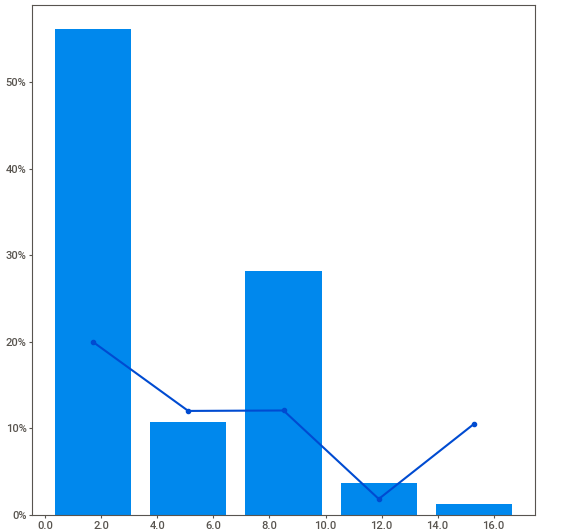
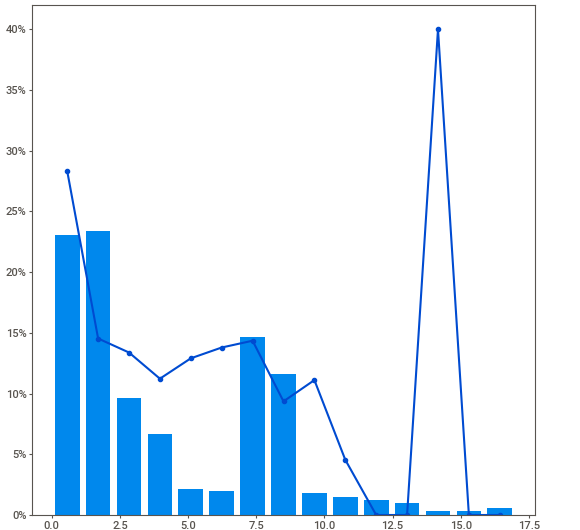
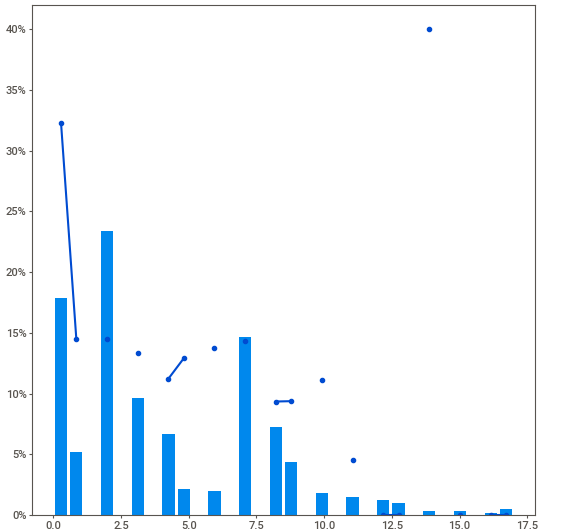
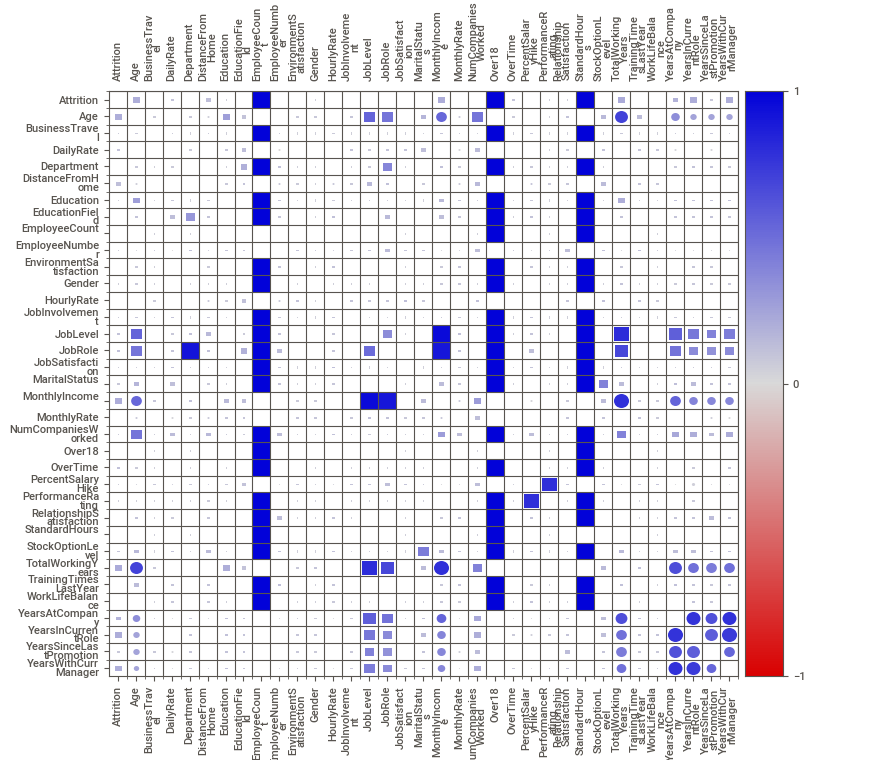
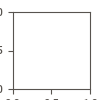

In [5]:
import sweetviz as sv

# Assuming your DataFrame is named "data" and your target column is "attrition"
report = sv.analyze(data, target_feat='Attrition')
report.show_notebook()

<a name="section_2"></a>
## 2. AutoML: pre-processing

[Return to contents](#contents)

In previous webinars we explored key data preparation steps such as handling missing values, treating outliers, feature selection, and One-Hot-Encoding. All of these steps can be carried out for us automatically using the `setup()` function in `pycaret`.

Below we have pre-set the `setup()` function with some basic settings.

> 🚀 For future use, consider and experiment with all of the recommend Data Pre-processing steps recommend at the link below. You can think of this as a comprehensive check list of steps you could consider that may improve the accuracy and robustness of your model: https://pycaret.gitbook.io/docs/get-started/preprocessing

In [7]:
# import pycaret classification
from pycaret.classification import *

s = setup(data, # our data
          target = 'Attrition', # what we want to predict
          ignore_features = ['EmployeeNumber','EmployeeCount'], # features that we know won't be predictive
          session_id = 123)

<a name="section_3"></a>
## 3. AutoML: model building

[Return to contents](#contents)

Let's now ask `pycaret` to find which model has the best accuracy (i.e. percentage correct across all classes) in our **training data alone**.

Using our training data alone to decide on which model to use prevents data leakage. Data leakage is where we have accidentally used the test data somehow to inform our model choices. This can lead to over fitting and unexpectedly poor performance when the model is used in a live environment (i.e. to actually predict who will churn).

> 🔑 https://scikit-learn.org/stable/common_pitfalls.html#data-leakage

We also ask `pycaret` to build the model with cross validation with 5 folds. 5-fold cross-validation will assess the performance of a model more accurately. It involves dividing the training dataset into five equal parts or "folds", then training the model five times, each time using four of the five folds as the training data and the remaining one for testing. This ensures every data point of the **training data alone** is used for both training and testing. The performance metrics you see below are the average values of those five runs.

> 🔑 https://scikit-learn.org/stable/modules/cross_validation.html

In [8]:
# find most accurate model
best_accuracy = compare_models(sort='Accuracy', fold=5)

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

We can see that the Linear Discriminant Analysis model or `lda` has the highest accuracy in the training data.

> 🔑 https://scikit-learn.org/stable/modules/lda_qda.html

We can now evaluate the `lda` model (built on the 1,029 rows of training data) on the held-out test data of 441 rows using a confusion matrix plot.

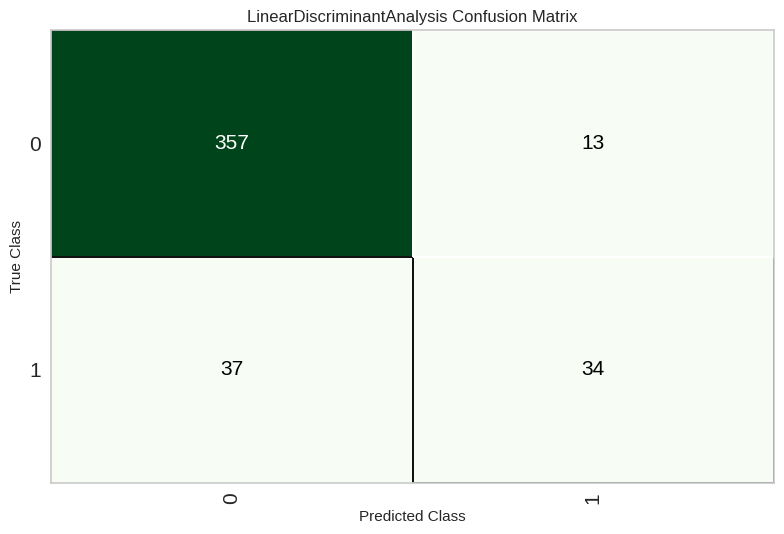

In [9]:
# plot confusion matrix
plot_model(best_accuracy, plot = 'confusion_matrix')

And we can return the Precision and Recall statistics of the confusion matrix plot above as follows.

Precision means, of the employees the model predicted would churn (34 + 13 in the right hand column), what percentage did it get right? ➡️ 34 / (34 + 13) = 72%

Recall means, of the employees who really did churn (37 + 34 in the bottom row), what percentage did the model identify? ➡️ 34 / (37 + 34) = 48%

In [ ]:
holdout_pred = predict_model(best_accuracy)


---

<div style="background-color: #f9f9f9; border-left: 10px solid #36a64f; padding: 1em;">
    
<h2 style="color: #36a64f;">⌨️ ACTIVITY 2: Part 1</h2>

</div>

- It's now time to consider how to put the predicted probability of an employee churning into action that most benefits the company.

- The company you are working for wants you to identify employees most likely to churn so that they can take an action to prevent it. Preventing churn saves money on recruitment to replace leavers, and the costs of losing corporate knowledge and training new employees.

- By default, most ML plots and packages use a 0.5 probability cut-off for binary classification. In other words, if the model's predicted probability is 0.5 or greater then the model predicts the class of interest, in this case that they will churn to a new job.

- ❓🤔 However, consider how your model will be used as how it will be used should influence the cut-off we recommend. What actions could the HR department take on employees your model predicts are most likely to churn? Will these actions be expensive (e.g. an interview followed by a pay rise)? Or perhaps intrusive in some way? Or perhaps the actions will be cheap such as an automated email with follow up? Put your ideas and thoughts in the chat or use the microphone.

- In summary, we need to ask domain experts and future users of the model, how much more important is it to be accurate when we classify as churn (i.e. Precision) compared to detecting a high proportion of real churners in the future (i.e. Recall).

- Let's assume the churn prevention action by HR is relatively cheap, non-intrusive, and effective (it has been shown to prevent churn). So perhaps it's a quick interview with pay review. HR colleagues tell you they would like a high Recall percentage (i.e. to identify most churners), and while they ideally want the prediction to be Precise, they don't mind interviewing some people who in reality don't go on to churn.

- Modify the `thresh` value below both above and below the traditional 0.5 cut off. Can you increase the Recall percentage to a fairly high number while still leaving a reasonable level of Precision? What cut-off value do you select that feels like a good balance of Precision and Recall that HR would acccept?

> 🔑 https://pycaret.gitbook.io/docs/get-started/functions/train#set-the-probability-threshold

---


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

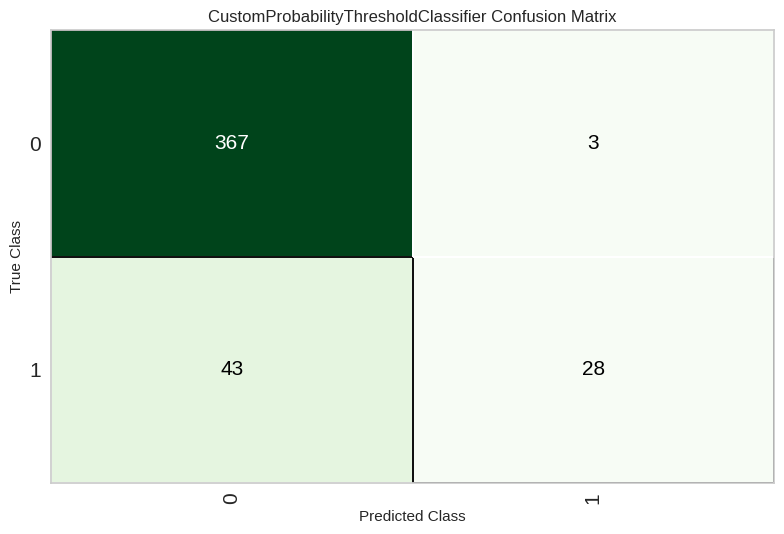

In [12]:
thresh = 0.6 # CHANGE THIS above and below 0.5 but ensure it is greater than 0 and less than 1
lda = create_model('lda',
                   probability_threshold = thresh,
                   fold=2)
plot_model(lda, plot = 'confusion_matrix')
holdout_pred = predict_model(lda)


---

<div style="background-color: #f9f9f9; border-left: 10px solid #36a64f; padding: 1em;">
    
<h2 style="color: #36a64f;">⌨️ ACTIVITY 2: Part 2</h2>

</div>

- By altering the threshold manually we are experiencing the trade-off between Precision and Recall where as one goes up the other goes down. Thankfully we can explore this trade-off automatically for every possible cut point of probability in one plot.

- Below is a plot of Precision against Recall for many probability cut-off points between 0 and 1. Notice that as Precision increases (y-axis) our Recall percentage decreases (and vice-versa).

- Let's assume we have found out that HR want to identify at least 80% of employees who really will go on to churn in the future. Use the plot below to read off for 80% Recall what is the likely Precision percentage?

- 🚀 Screenshot this plot and the confusion matrix above where Recall is about 80%. Write a plain English sentence that explains how your model is likely to perform when used.

> 🔑 https://pycaret.gitbook.io/docs/get-started/functions/train#set-the-probability-threshold

> 🚀 If costs and benefits are well known, a bespoke cost function could be built and used to select the best model (scroll to Confusion Matrix section here) https://pycaret.gitbook.io/docs/learn-pycaret/official-blog/predict-lead-score-the-right-way-using-pycaret-1

---


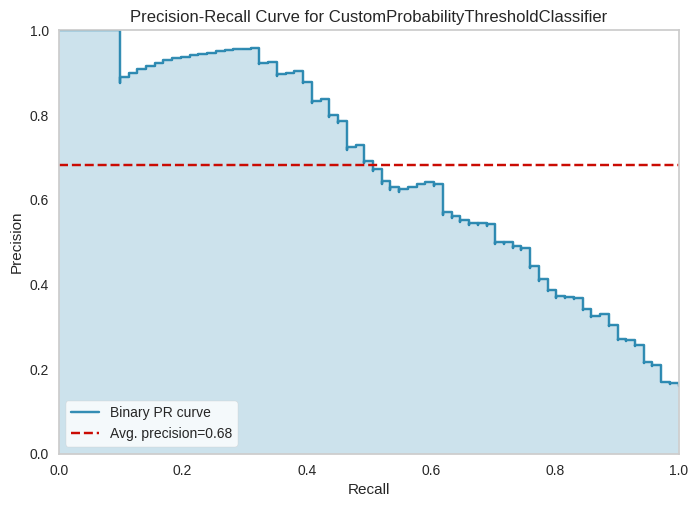

In [ ]:
plot_model(lda, plot = 'pr')

<a name="section_4"></a>
## 4. Explain how the model works to stakeholders

[Return to contents](#contents)

Stakeholders are rightly cautious about using automatic methods to support decision making. Sometimes this is out of a fear of being replaced with a less effective and potentially biased method. And indeed we should consider any legal or ethical implications of automated decision making as explained by the Information Commissioner's Office (ICO) below.

> 🔑 https://ico.org.uk/for-organisations/guide-to-data-protection/guide-to-the-general-data-protection-regulation-gdpr/automated-decision-making-and-profiling/

Assuming the churn model is used in an ethical manner, we will still always need to explain to stakeholders **how** the prediction is made. There are many ways to do this and we will now explore two of them.

> 🔑 https://ico.org.uk/for-organisations/guide-to-data-protection/key-dp-themes/explaining-decisions-made-with-ai/

A first basic view is to explain which features are most important in the model.

> *In `PyCaret`, feature importance for a binary model is determined using permutation feature importance. This process involves training a model, then shuffling the values of each feature in the validation data and measuring the decrease in the model's performance. This decrease signifies the importance of the feature: a large decrease means the feature is important, while a small decrease means it's less important. The results are displayed in a plot, showing the importance of each feature in descending order.* 🔑 https://pycaret.gitbook.io/docs/learn-pycaret/official-blog/predict-lead-score-the-right-way-using-pycaret-1#feature-importance-plot

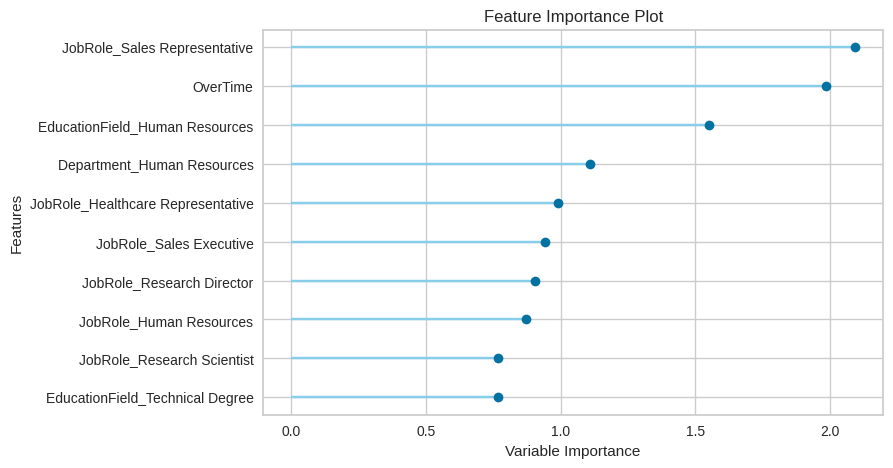

In [13]:
# plot feature importance
plot_model(lda, plot = 'feature')

Another common method to explain models is using SHAP values (**SH**apley **A**dditive ex**P**lanations).

However, in `pycaret`, SHAP value explanations only work on tree based models. So let's build a tree based model using `xgboost` so that we can experiment with using SHAP to explain a model.

> 🔑 https://github.com/slundberg/shap/blob/master/README.md

> 🔑 https://xgboost.readthedocs.io/en/stable/tutorials/model.html

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

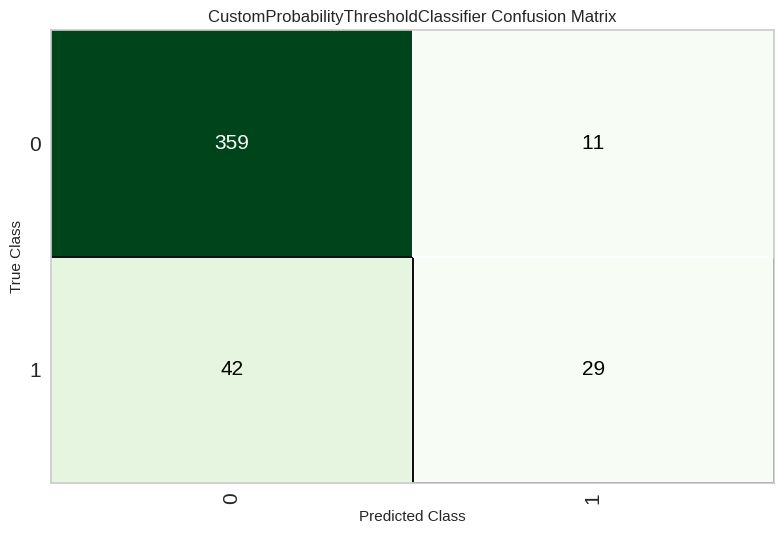

In [14]:
thresh = 0.5 # Again select a threhold with your desired balance of Precision and Recall

xg = create_model('xgboost',
                   probability_threshold = thresh,
                  fold=5)
plot_model(xg, plot = 'confusion_matrix')
holdout_pred_xg = predict_model(xg)

The SHAP plot below is a beeswarm plot to summarise the entire distribution of SHAP values for each feature.

The y-axis has all the important features of the model, the x-axis is the Shapley value of associated features, and the colour scale is the actual value of the feature where blue is low and red is high. Each dot on the graph at each feature is an employee from the test set.

The higher the SHAP value is (x-axis), the higher the likelihood of positive class (which in this case is churn).

For example, for `OverTime`, see how high feature values (in red) also have high SHAP value (i.e. impact on the model and a greater chance of churn). In other words, high `OverTime` overtime increases the likelihood of churn which is no surprise.

> 🚀 Screenshot this plot for you slides, then pick one or more other features. Describe that feature in the same way as `OverTime`. Pretend you are speaking to a non-technical stakeholder as you describe it.

> 🔑 https://pycaret.gitbook.io/docs/learn-pycaret/official-blog/predict-lead-score-the-right-way-using-pycaret-1#shap-values

Let's go on to look at employees SHAP scores individually and think about what further insight we could offer to stakeholders about how the model works.


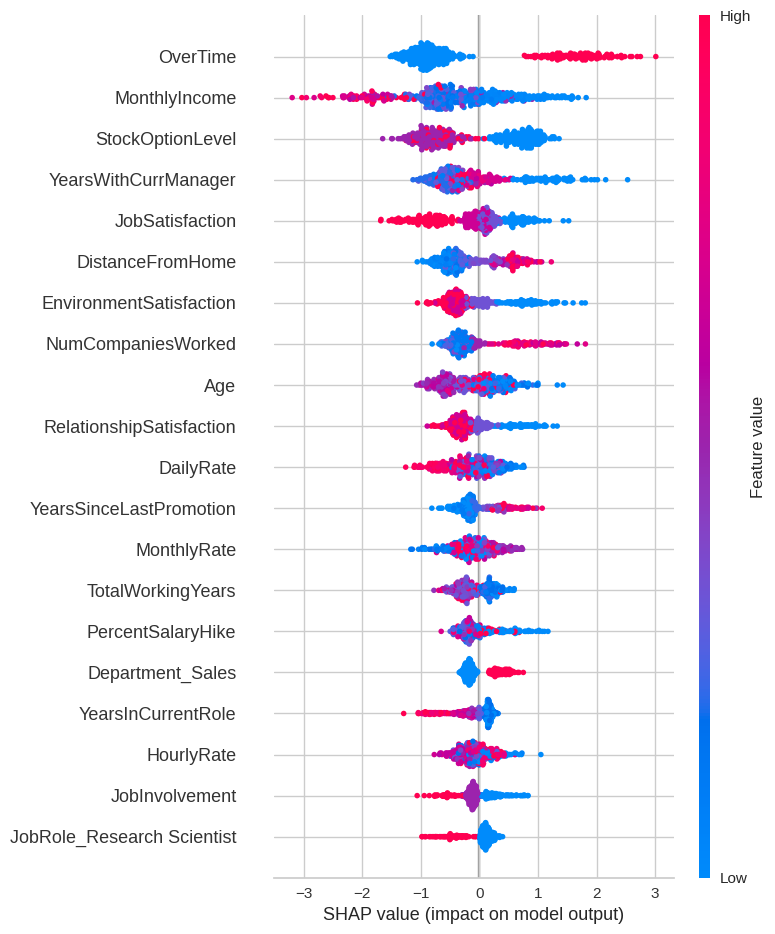

In [16]:
# interpret summary model
interpret_model(xg, plot = 'summary')


---

<div style="background-color: #f9f9f9; border-left: 10px solid #36a64f; padding: 1em;">
    
<h2 style="color: #36a64f;">⌨️ ACTIVITY 3</h2>

</div>

- Let's now study the SHAP values of one employee at a time and consider how we could use this new plot to explain to our stakeholders how the model works on employees who really did churn or did not churn.

- The left-most numbers in the two dataframes printed below give you index values of employees that did churn and did not churn. Use those numbers to update the plot code further below and create one or more examples of churners and non-churners.

- Screenshot your examples for your slides and describe what impacted the predicted probability the most in these examples in either direction of higher or lower probability.

- 🚀 ❓🤔 Do you think your explanations would satisfy these ICO guidelines? If not, what would be a more transparent method? For example, logistic regression? https://ico.org.uk/for-organisations/guide-to-data-protection/key-dp-themes/explaining-decisions-made-with-artificial-intelligence/part-2-explaining-ai-in-practice/task-4-translate/

> 🔑 https://pycaret.gitbook.io/docs/get-started/functions/train#set-the-probability-threshold

---


In [17]:
obs = 437 # CHANGE THIS VALUE

# Create a single-row DataFrame for the observation
obs_df = s.X_test.iloc[[obs]]

# Use the trained model to make a prediction for the observation
prediction = predict_model(xg, data=obs_df)

# Print out the actual prediction
print(f"The model's prediction is: {prediction.prediction_label.values[0]}")

print("They DID churn in reality" if s.y_test.iloc[obs] == 1 else "They did NOT churn in reality")
display(interpret_model(xg, plot = 'reason', observation = obs))
display(s.X_test.iloc[obs])


The model's prediction is: 0
They did NOT churn in reality


Age                                             38
BusinessTravel                   Travel_Frequently
DailyRate                                      508
Department                  Research & Development
DistanceFromHome                                 6
Education                                        4
EducationField                       Life Sciences
EnvironmentSatisfaction                          1
Gender                                        Male
HourlyRate                                      72
JobInvolvement                                   2
JobLevel                                         2
JobRole                     Manufacturing Director
JobSatisfaction                                  3
MaritalStatus                              Married
MonthlyIncome                                 5321
MonthlyRate                                  14284
NumCompaniesWorked                               2
Over18                                           Y
OverTime                       

<a name="section_5"></a>
## 5. 🚀 Further checks (e.g. fairness)

[Return to contents](#contents)

Let's now consider if our model is fair. Fairness means..

> *..that you should only handle personal data in ways that people would reasonably expect and not use it in ways that have **unjustified adverse effects on them.***

> 🔑 https://ico.org.uk/for-organisations/guide-to-data-protection/guide-to-the-general-data-protection-regulation-gdpr/principles/lawfulness-fairness-and-transparency/#fairness

> ❓🤔 Are there any other features beyond `Gender` we should check for fairness?

> 🔑 https://pycaret.gitbook.io/docs/learn-pycaret/videos#check-ml-fairness

Samples  Accuracy       AUC    Recall Precision        F1     Kappa  \
Gender                                                                       
Female     185  0.902703   0.67375      0.36  0.818182       0.5  0.454992   
Male       256  0.890625  0.704141  0.413043      0.95  0.575758  0.523911   

             MCC Selection Rate  
Gender                           
Female  0.502359       0.059459  
Male    0.584087       0.078125

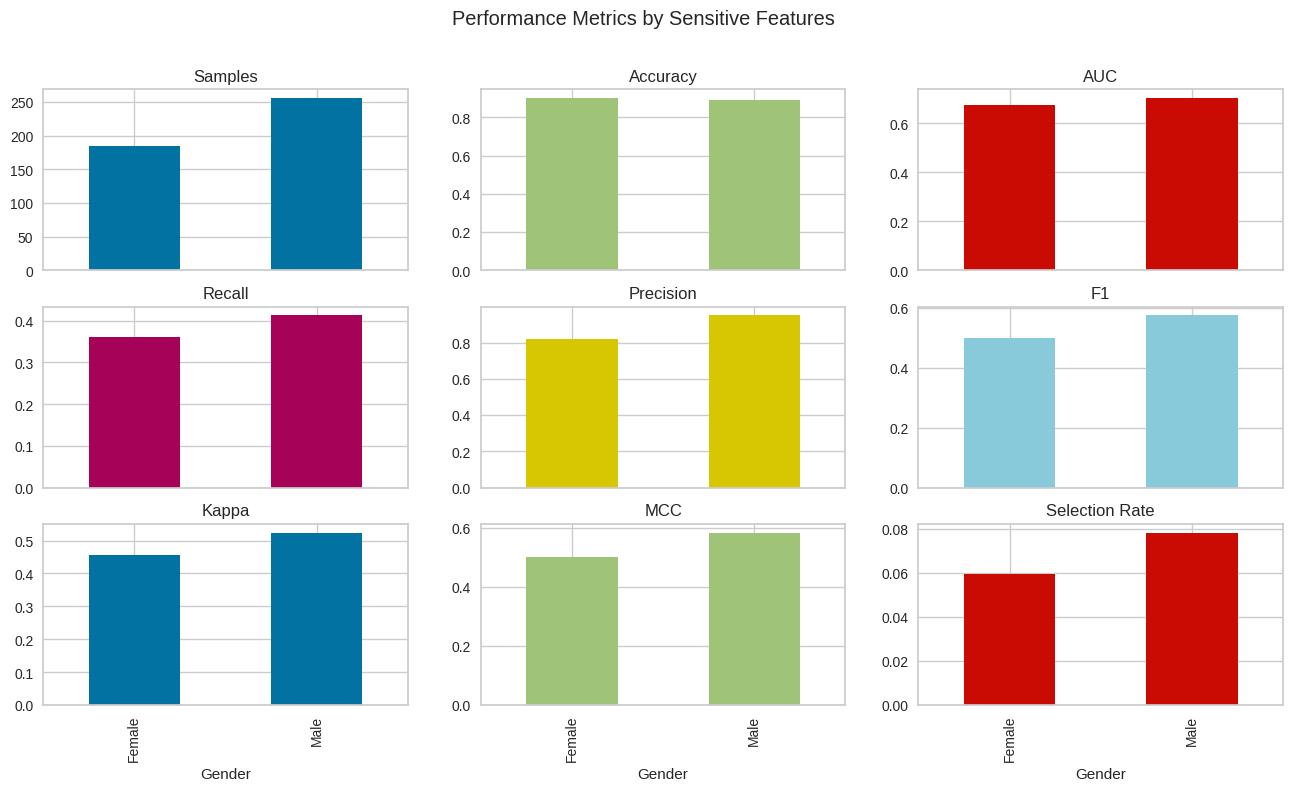

In [18]:
# check fairness
check_fairness(lda, sensitive_features = ['Gender'])